In [1]:
import sqlite3

import os
import re

import numpy as np
# It is apparently officially accepted to explicitly
# list all the functions you need from numpy:
from numpy import array, zeros, exp, random, dot
from numpy import shape, reshape, meshgrid, linspace
from numpy import hstack, vstack

import statsmodels
import sklearn
import arch
import backtrader
import pyfolio
import xgboost

import pandas as pd
print('Panda Version:', pd.__version__)

# Set ipython's max row display
pd.set_option('display.max_row', 100, 'display.max_columns', 25)

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100 # highres display

import tensorflow as tf
from tensorflow import Variable

from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import TimeDistributed, RepeatVector

from keras.optimizers import SGD

from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from keras.layers import LSTM, Dense, Concatenate

from keras.optimizers import SGD

import collections
from collections import Counter

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import signal

# Import date class from datetime module
import time
import datetime
# import datetime as dt
from datetime import date
print("Today date is: ", date.today())

/usr/local/lib/python3.11/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Panda Version: 2.2.2


2024-08-05 20:37:08.572240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 20:37:08.589336: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 20:37:08.594575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Today date is:  2024-08-05


In [2]:
'''
4. scikit-learn
Use Case: Machine learning and statistical modeling.
Features: Provides implementations of various machine learning algorithms and tools for model evaluation and selection.
5. Arch
Use Case: Financial econometrics.
Features: Focuses on ARCH (Autoregressive Conditional Heteroskedasticity) and GARCH (Generalized ARCH) models for volatility modeling.
6. matplotlib & seaborn
Use Case: Data visualization.
Features: These libraries help visualize time series data and statistical properties.
7. Quantlib
Use Case: Quantitative finance.
Features: Provides tools for pricing derivatives, calculating risk metrics, and other financial computations.
8. Backtrader
Use Case: Backtesting trading strategies.
Features: Allows for backtesting of trading strategies with a focus on time series data.
9. pyfolio
Use Case: Performance and risk analysis of financial portfolios.
Features: Provides functionalities for portfolio and risk analytics, including tear sheets
'''

'\n4. scikit-learn\nUse Case: Machine learning and statistical modeling.\nFeatures: Provides implementations of various machine learning algorithms and tools for model evaluation and selection.\n5. Arch\nUse Case: Financial econometrics.\nFeatures: Focuses on ARCH (Autoregressive Conditional Heteroskedasticity) and GARCH (Generalized ARCH) models for volatility modeling.\n6. matplotlib & seaborn\nUse Case: Data visualization.\nFeatures: These libraries help visualize time series data and statistical properties.\n7. Quantlib\nUse Case: Quantitative finance.\nFeatures: Provides tools for pricing derivatives, calculating risk metrics, and other financial computations.\n8. Backtrader\nUse Case: Backtesting trading strategies.\nFeatures: Allows for backtesting of trading strategies with a focus on time series data.\n9. pyfolio\nUse Case: Performance and risk analysis of financial portfolios.\nFeatures: Provides functionalities for portfolio and risk analytics, including tear sheets\n'

In [1]:
!pwd

!ls -la /workspace/data/crypto_md/

/workspace/leo
total 82604
drwxrwxr-x 1 1000 1000    3250 Aug  5 13:00 .
drwxrwxr-x 1 1000 1000      18 Jun  3 23:40 ..
-rw------- 1 1000 1000 1449984 Jun  4 00:49 20240601.mktdata.ohlcv.db
-rw------- 1 1000 1000 1445888 Jun  3 23:44 20240602.mktdata.ohlcv.db
-rw------- 1 1000 1000 1437696 Jun  4 16:45 20240603.mktdata.ohlcv.db
-rw------- 1 1000 1000 1269760 Jun  5 10:00 20240604.mktdata.ohlcv.db
-rw------- 1 1000 1000 1081344 Jun  6 10:00 20240605.mktdata.ohlcv.db
-rw------- 1 1000 1000 1441792 Jun  7 10:00 20240606.mktdata.ohlcv.db
-rw------- 1 1000 1000 1445888 Jun  8 10:00 20240607.mktdata.ohlcv.db
-rw------- 1 1000 1000 1449984 Jun  9 10:00 20240608.mktdata.ohlcv.db
-rw------- 1 1000 1000 1175552 Jul 19 14:03 20240609.mktdata.ohlcv.db
-rw------- 1 1000 1000 1437696 Jun 11 10:00 20240610.mktdata.ohlcv.db
-rw------- 1 1000 1000 1449984 Jun 12 10:01 20240611.mktdata.ohlcv.db
-rw------- 1 1000 1000 1445888 Jun 13 10:01 20240612.mktdata.ohlcv.db
-rw------- 1 1000 1000 1445888 Jun 14 10

In [2]:
directory = "/workspace/data/crypto_md"

# List of datesprint
dates = [
        #  '20240601', 
        #  '20240602', 
        #  '20240603',
        #  '20240604', 
        #  '20240605', 
        #  '20240606', 
        #  '20240607', 
        #  '20240608',
        #  '20240609',
        #  '20240610' ,
        #  '20240611',
        #  '20240612',
        #  '20240613', 
        #  '20240614', 
        #  '20240615', 
        #  '20240616',  
        #  '20240617',
        #  '20240618',
        #  '20240619',
        #  '20240620',
        #  '20240621', 
        #  '20240622', 
        #  '20240623',
        #  '20240624',
        #  '20240625', 
        #  '20240626',
        #  '20240627',
        #  '20240628',
        #  '20240629',
        #  '20240630',
    
        #  '20240701',
        #  '20240702',
        #  '20240703',
        #  '20240704',
        #  '20240705',
        #  '20240706',
        #  '20240707',
        #  '20240708',
        #  '20240709',
        #  '20240710',
        #  '20240711',
        #  '20240712',
        #  '20240713',
        #  '20240714',
        #  '20240715'
        # ]    
        #  '20240716',  
        #  '20240717',
        #  '20240718',
        #  '20240719',
        #  '20240720',
         '20240721', 
         '20240722', 
         '20240723',
         '20240724',
         '20240725', 
         '20240726',
         '20240727',
         '20240728',
         '20240729',
         '20240730',
         '20240731',

         '20240801',
         '20240802',
         '20240803',
         '20240804'
        ]
   
# Create an entirely empty DataFrame
df_concat = pd.DataFrame()

for date in dates:
    # Construct the filename
    filename = f"{directory}/{date}.mktdata.ohlcv.db"
    
    # Create the SQLite connection
    conn = sqlite3.connect(filename)
    
    # Read the data into a DataFrame
    df = pd.read_sql_query("select * from coinbase_ohlcv_1min", conn)

    df_concat = pd.concat([df_concat, df], axis = 0,ignore_index = True)
    # Print the combined DataFrame
    # print(df_concat.shape[0])
    # print(df_concat.shape[1])
    conn.close()
print (df_concat.shape[0])
print (df_concat.head(3))
print (df_concat.tail(3))

86221
                tstamp exchange_id instrument_id      open      high  \
0  1721520000000000000    COINBASE  PAIR-BTC-USD  67163.82  67218.39   
1  1721520060000000000    COINBASE  PAIR-BTC-USD  67214.52  67228.20   
2  1721520120000000000    COINBASE  PAIR-BTC-USD  67209.22  67215.07   

        low     close    volume          vwap  
0  67157.99  67216.19  5.171900  67199.886168  
1  67203.56  67203.58  2.185463  67217.543340  
2  67164.16  67174.18  1.584411  67196.437419  
                    tstamp exchange_id instrument_id    open    high     low  \
86218  1722815820000000000    COINBASE  PAIR-XRP-USD  0.5223  0.5232  0.5223   
86219  1722815880000000000    COINBASE  PAIR-XRP-USD  0.5230  0.5234  0.5224   
86220  1722815940000000000    COINBASE  PAIR-XRP-USD  0.5223  0.5229  0.5222   

        close         volume      vwap  
86218  0.5232   21822.376721  0.522804  
86219  0.5225   47397.404109  0.522631  
86220  0.5229  138078.735162  0.522739  


In [3]:
df_concat['tstmp'] = pd.to_datetime(df_concat['tstamp'])

# Extract individual components
df_concat['year'] = df_concat['tstmp'].dt.year
df_concat['month'] = df_concat['tstmp'].dt.month
df_concat['day'] = df_concat['tstmp'].dt.day
df_concat['hour'] = df_concat['tstmp'].dt.hour
df_concat['minute'] = df_concat['tstmp'].dt.minute
df_concat['second'] = df_concat['tstmp'].dt.second

df_concat['date'] = df_concat['month'].astype(str) + '-' + df_concat['day'].astype(str) + '-' + df_concat['hour'].astype(str) + '-' + df_concat['minute'].astype(str)
df_concat = df_concat.sort_values(by = ['month', 'day', 'hour', 'minute'])

selected_columns = ['date', 'instrument_id', 'close', 'volume', 'vwap']
df_concat = df_concat[selected_columns]

print (df_concat.tail(3))

# instrument_list = df_concat['instrument_id'].unique().tolist()
# print("Distinct values in column 'instrument_id':", instrument_list)

            date instrument_id      close         volume         vwap
83340  8-4-23-59  PAIR-ETH-USD  2688.3100      82.256123  2686.567577
84780  8-4-23-59  PAIR-LTC-USD    62.4300     141.888281    62.419958
86220  8-4-23-59  PAIR-XRP-USD     0.5229  138078.735162     0.522739


In [4]:
# print (df_concat[df_concat['instrument_id'] == 'PAIR-BTC-USD'].tail(30))
# print (df_concat[df_concat['instrument_id'] == 'PAIR-ETH-USD'].tail(30))
# print (df_concat[df_concat['instrument_id'] == 'PAIR-LTC-USD'].tail(30))
# print (df_concat[df_concat['instrument_id'] == 'PAIR-XRP-USD'].tail(30))
df_concat_btc = df_concat[df_concat['instrument_id'] == 'PAIR-BTC-USD']
print (df_concat_btc.tail(3))

            date instrument_id     close     volume          vwap
81898  8-4-23-57  PAIR-BTC-USD  58099.85  11.064438  58025.626507
81899  8-4-23-58  PAIR-BTC-USD  58105.52  35.875887  58105.136515
81900  8-4-23-59  PAIR-BTC-USD  58137.92   8.787810  58119.955528


In [5]:
# BTC
df_concat_btc = df_concat[df_concat['instrument_id'] == 'PAIR-BTC-USD']

# Reset Index
df_concat_btc = df_concat_btc.reset_index(drop = True)

# Rename Vars
df_concat_btc['close_btc'] = df_concat_btc['close']/100000.00
df_concat_btc['volume_btc'] = df_concat_btc['volume']
df_concat_btc['vwap_btc'] = df_concat_btc['vwap']/100000.00

df_concat_btc = df_concat_btc.drop('close', axis = 1)
df_concat_btc = df_concat_btc.drop('volume', axis = 1)
df_concat_btc = df_concat_btc.drop('vwap', axis = 1)
df_concat_btc = df_concat_btc.drop('instrument_id', axis = 1)

# print (df_concat_btc.tail(30))

# LTC
df_concat_ltc = df_concat[df_concat['instrument_id'] == 'PAIR-LTC-USD']

# Reset Index
df_concat_ltc = df_concat_ltc.reset_index(drop = True)

# Rename Vars
df_concat_ltc['close_ltc'] = df_concat_ltc['close']/100.00
df_concat_ltc['volume_ltc'] = df_concat_ltc['volume']
df_concat_ltc['vwap_ltc'] = df_concat_ltc['vwap']/100.00

df_concat_ltc = df_concat_ltc.drop('close', axis = 1)
df_concat_ltc = df_concat_ltc.drop('volume', axis = 1)
df_concat_ltc = df_concat_ltc.drop('vwap', axis = 1)
df_concat_ltc = df_concat_ltc.drop('instrument_id', axis = 1)

# print (df_concat_ltc.head(3))

# ETH
df_concat_eth = df_concat[df_concat['instrument_id'] == 'PAIR-ETH-USD']

# Reset Index
df_concat_eth = df_concat_eth.reset_index(drop = True)

# Rename Vars
df_concat_eth['close_eth'] = df_concat_eth['close']/10000.00
df_concat_eth['volume_eth'] = df_concat_eth['volume']
df_concat_eth['vwap_eth'] = df_concat_eth['vwap']/10000.00

df_concat_eth = df_concat_eth.drop('close', axis = 1)
df_concat_eth = df_concat_eth.drop('volume', axis = 1)
df_concat_eth = df_concat_eth.drop('vwap', axis = 1)
df_concat_eth = df_concat_eth.drop('instrument_id', axis = 1)

print (df_concat_eth.tail(3))

# XRP
df_concat_xrp = df_concat[df_concat['instrument_id'] == 'PAIR-XRP-USD']

# Reset Index
df_concat_xrp = df_concat_xrp.reset_index(drop = True)

# Rename Vars
df_concat_xrp['close_xrp'] = df_concat_xrp['close']
df_concat_xrp['volume_xrp'] = df_concat_xrp['volume']
df_concat_xrp['vwap_xrp'] = df_concat_xrp['vwap']

df_concat_xrp = df_concat_xrp.drop('close', axis = 1)
df_concat_xrp = df_concat_xrp.drop('volume', axis = 1)
df_concat_xrp = df_concat_xrp.drop('vwap', axis = 1)
df_concat_xrp = df_concat_xrp.drop('instrument_id', axis = 1)

# print (df_concat_xrp.head(3))

df_M1 = pd.merge(df_concat_xrp, df_concat_eth, on = 'date', how = 'outer')
print (df_M1.tail(3))
print ("M1:  ", df_M1.shape[0])

#           date  close_xrp    volume_xrp  vwap_xrp  close_eth  volume_eth  \
# 52615  7-7-9-7     0.4376   2599.821206  0.437600   0.301277   12.252974   
# 52616  7-7-9-8     0.4372  23718.539194  0.437213   0.301136    0.907615   
# 52617  7-7-9-9     0.4371   4330.750011  0.437266   0.301111    1.252245   

# 'month', 'day', 'hour', 'minute'
# Oleg, is it possible that a data for XRP were sptopped to be collected at July 7.
# Please, check.

df_M2 = pd.merge(df_M1, df_concat_ltc, on = 'date', how = 'outer')
# print (df_M2.head(3))
# print ("M2:  ", df_M2.shape[0])
df_M3 = pd.merge(df_M2, df_concat_btc, on = 'date', how = 'outer')
# print (df_M3.head(3))
# print ("M3:  ", df_M3.shape[0])

# Drop rows with any NaN value and assign it to a new DataFrame
sample = df_M3.dropna(axis = 0).reset_index(drop = True)

print ("========================================")
print (sample.head(2))
print (sample.tail(2))
sample_size = sample.shape[0]
print ("test sample size: ", sample_size)

            date  close_eth  volume_eth  vwap_eth
21553  8-4-23-57   0.268752   39.193421  0.268422
21554  8-4-23-58   0.268432   31.893057  0.268459
21555  8-4-23-59   0.268831   82.256123  0.268657
          date  close_xrp    volume_xrp  vwap_xrp  close_eth  volume_eth  \
21553  8-4-9-7     0.5487  14556.914441  0.548757   0.290817    8.595740   
21554  8-4-9-8     0.5495  18459.739887  0.548913   0.291027   17.632035   
21555  8-4-9-9     0.5498  25802.138530  0.549838   0.290987    5.739295   

       vwap_eth  
21553  0.290673  
21554  0.290951  
21555  0.291012  
M1:   21556
       date  close_xrp    volume_xrp  vwap_xrp  close_eth  volume_eth  \
0  7-21-0-0     0.5947  63177.491758  0.594627   0.352176    2.757178   
1  7-21-0-1     0.5951  14104.439378  0.594942   0.352136   25.736542   

   vwap_eth  close_ltc  volume_ltc  vwap_ltc  close_btc  volume_btc  vwap_btc  
0  0.352067     0.7311  113.257967  0.730940   0.672162    5.171900  0.671999  
1  0.352154     0.7309   62.564

In [6]:
print ('df_M1 shape:  ', df_M1.shape[0])
print ('df_M2 shape:  ', df_M2.shape[0])
print ('df_M3 shape:  ', df_M3.shape[0])

print ('sample shape: ', sample.shape[0])

df_M1 shape:   21556
df_M2 shape:   21556
df_M3 shape:   21556
sample shape:  21554


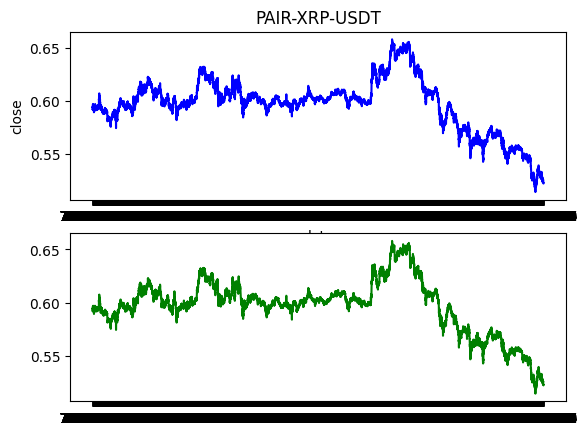

In [12]:
# Create a figure and axis object
fig, ax = plt.subplots(2 , 1)

# Plot the data
ax[0].plot(df_concat_xrp['date'], df_concat_xrp['close_xrp'], 'blue')
# ax[0].plot(df_concat_btc['date'], df_concat_btc['vwap_btc'], 'green')

# Customize the plot
ax[0].set_title('PAIR-XRP-USDT')
ax[0].set_xlabel('date')
ax[0].set_ylabel('close')

ax[1].plot(df_concat_xrp['date'], df_concat_xrp['vwap_xrp'], 'green')
# ax[1].plot(df_concat_btc['date'], df_concat_btc['volume_BTC'], 'red')

# Show the plot
plt.show()

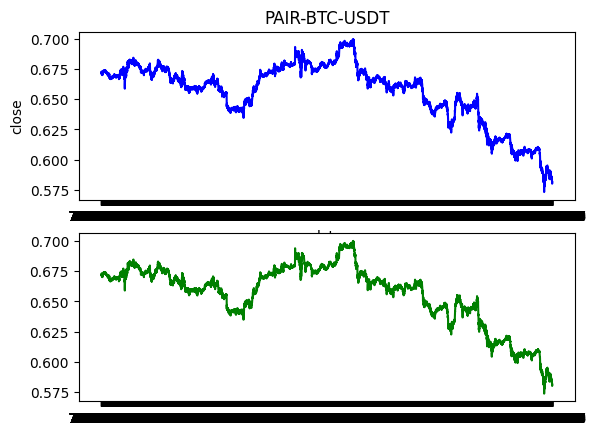

In [13]:
# Create a figure and axis object
fig, ax = plt.subplots(2 , 1)

# Plot the data
ax[0].plot(df_concat_btc['date'], df_concat_btc['close_btc'], 'blue')
# ax[0].plot(df_concat_btc['date'], df_concat_btc['vwap_btc'], 'green')

# Customize the plot
ax[0].set_title('PAIR-BTC-USDT')
ax[0].set_xlabel('date')
ax[0].set_ylabel('close')

ax[1].plot(df_concat_btc['date'], df_concat_btc['vwap_btc'], 'green')
# ax[1].plot(df_concat_btc['date'], df_concat_btc['volume_BTC'], 'red')

# Show the plot
plt.show()

In [7]:
split_index = round(sample.shape[0] * 0.8)

# First part of the DataFrame
sample_test = sample.iloc[:split_index]

# Second part of the DataFrame
sample_valid = sample.iloc[split_index:]

print("\nFirst part of the DataFrame:")
print (sample_test.tail(2))

print("\nSecond part of the DataFrame:")
print (sample_valid.head(2))


First part of the DataFrame:
           date  close_xrp    volume_xrp  vwap_xrp  close_eth  volume_eth  \
17241  8-2-0-14     0.5951  31361.789797  0.595477   0.320591    8.096218   
17242  8-2-0-15     0.5945   3799.085157  0.594719   0.320811   50.375503   

       vwap_eth  close_ltc  volume_ltc  vwap_ltc  close_btc  volume_btc  \
17241  0.320753     0.6976  178.580100  0.698008   0.653866    3.709812   
17242  0.320744     0.6972   55.220535  0.697385   0.653996    7.909392   

       vwap_btc  
17241  0.654079  
17242  0.653906  

Second part of the DataFrame:
           date  close_xrp    volume_xrp  vwap_xrp  close_eth  volume_eth  \
17243  8-2-0-16     0.5952  14314.515713  0.594261   0.320911   27.825691   
17244  8-2-0-17     0.5958  25423.483325  0.595479   0.321092  165.355943   

       vwap_eth  close_ltc  volume_ltc  vwap_ltc  close_btc  volume_btc  \
17243  0.320775     0.6973   49.423002  0.696897   0.654105    3.192297   
17244  0.320918     0.6983   25.107065  0.698

In [8]:
# Detrend Series Function 
# =========================
def detrend_series(series):
    trend = np.polyfit(np.arange(len(series)), series.values, 1)
    trend_line = np.polyval(trend, np.arange(len(series)))
    detrended_series = series - trend_line
    return detrended_series

crypto_list = ['XRP', 'ETH', 'LTC', 'BTC']

In [9]:
#  Model Input
# =============================================
sl = 132 # <--- sequence length
batch = 100  # <--- batch size
n_features = 4 # <---- no. of variables
n_out = 4 # <----- no. of predicted variables
frwd = 10 # <----- how many to predict
# =============================================

print ('sample_size')
print (sample_size)
print ('===========================================================')

# Trimming Indices !!!
# Marking selected rows
# sample_test['Selected'] = 0
sample_test.loc[:, 'Selected'] = 0

# Selecting m random rows without replacement
np.random.seed(125)
selected_indices = np.random.choice(sample_test.index, size = batch, replace = False)

sample_test.loc[selected_indices, 'Selected'] = 1 

# print ('Selected Indices')
# print (selected_indices)

chosen_idx1 = sample_test[sample_test['Selected'] == 1].index
print ('Selected Indices: chosen_idx1')
print (chosen_idx1)
print (type(chosen_idx1))

# =============================================
# thrown_idx1 = chosen_idx1[chosen_idx1 <= sl]
# cnt_thrown_idx1 = len(thrown_idx1)

# chosen_idx3 = chosen_idx2[chosen_idx2 < (sample_size - frwd)]

# thrown_idx2 = chosen_idx2[chosen_idx2 >= (sample_size - frwd)]
# cnt_thrown_idx2 = len(thrown_idx2)
# =============================================

cnt_thrown_idx1 = 0
cnt_thrown_idx2 = 0

for idx in chosen_idx1:
    # print (sample_test.iloc[idx-(sl-1): idx+(frwd+1)])
    # print (idx-(sl-1), idx+(frwd+1))
    
    if (idx-(sl-1) < 0):
       print ('scratch index on a left:  ', idx)
       cnt_thrown_idx1 = cnt_thrown_idx1 + 1
       print ('cnt_thrown_idx1:  ', cnt_thrown_idx1)
       chosen_idx1 = chosen_idx1.drop(idx)
       print (chosen_idx1)
        
print (' ============ Second Cycle ========================= ')

for idx in chosen_idx1:
    if (idx+(frwd+1) > sample_size):
       print ('scratch index on a right:  ', idx)
       cnt_thrown_idx2 = cnt_thrown_idx2 + 1
       print ('cnt_thrown_idx2:  ', cnt_thrown_idx2)
       chosen_idx1 = chosen_idx1.drop(idx)
       print (chosen_idx1)


print ('cnt_thrown_idx1:  ', cnt_thrown_idx1)
print ('cnt_thrown_idx2:  ', cnt_thrown_idx2)

cnt_thrown_idx = cnt_thrown_idx1 + cnt_thrown_idx2
print ('cnt_thrown_idx:  ', cnt_thrown_idx)

print ('batch: ', batch)



sample_size
21554
Selected Indices: chosen_idx1
Index([  221,   237,   247,   262,   445,   462,   522,  1203,  1273,  1462,
        1588,  1963,  1985,  2179,  3145,  3613,  3702,  3777,  3979,  4505,
        4759,  4931,  5131,  5500,  5770,  5798,  5857,  5971,  6014,  6143,
        6145,  6273,  6399,  6700,  7271,  7349,  7708,  7723,  7948,  8043,
        8050,  8160,  8166,  8432,  8454,  8598,  8677,  8726,  8749,  8798,
        8985,  9314,  9535, 10108, 10553, 10896, 10998, 11165, 11546, 11586,
       11711, 11758, 11806, 11967, 12282, 12655, 12679, 12683, 12713, 12754,
       13031, 13662, 13745, 13815, 13890, 14012, 14115, 14130, 14258, 14274,
       14496, 14556, 14881, 14947, 14990, 15249, 15303, 15305, 15407, 15476,
       15559, 15721, 15759, 16024, 16489, 16527, 16677, 16808, 16888, 17013],
      dtype='int64')
<class 'pandas.core.indexes.base.Index'>
 ============ Second Cycle ========================= 
cnt_thrown_idx1:   0
cnt_thrown_idx2:   0
cnt_thrown_idx:   0
bat

/tmp/ipykernel_638/3067181419.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_test.loc[:, 'Selected'] = 0


In [10]:
#  Model Input
# =============================================
sl = 132 # <--- sequence length
batch = 100  # <--- batch size
n_features = 4 # <---- no. of variables
n_out = 4 # <----- no. of predicted variables
frwd = 10 # <----- how many to predict
# =============================================

print ('sample_size')
print (sample_size)
# print ('===========================================================')

# Trimming Indices !!!
# Marking selected rows
# sample_test['Selected'] = 0
sample_test.loc[:, 'Selected'] = 0

# Selecting m random rows without replacement
np.random.seed(125)
selected_indices = np.random.choice(sample_test.index, size = batch, replace = False)

sample_test.loc[selected_indices, 'Selected'] = 1 

chosen_idx = sample_test[sample_test['Selected'] == 1].index

cnt_thrown_idx1 = 0
cnt_thrown_idx2 = 0

for idx in chosen_idx:    
    if (idx-(sl-1) < 0):
       # print ('scratch index on a left:  ', idx)
       cnt_thrown_idx1 = cnt_thrown_idx1 + 1
       # print ('cnt_thrown_idx1:  ', cnt_thrown_idx1)
       chosen_idx = chosen_idx.drop(idx)
       # print (chosen_idx)

for idx in chosen_idx:
    if (idx+(frwd+1) > sample_size):
       # print ('scratch index on a right:  ', idx)
       cnt_thrown_idx2 = cnt_thrown_idx2 + 1
       # print ('cnt_thrown_idx2:  ', cnt_thrown_idx2)
       chosen_idx = chosen_idx.drop(idx)
       # print (chosen_idx)

cnt_thrown_idx = cnt_thrown_idx1 + cnt_thrown_idx2

all_ts_close_xrp = np.empty((1, )) # final input/output
all_ts_close_eth = np.empty((1, )) # final input/output
all_ts_close_ltc = np.empty((1, )) # final input/output
all_ts_close_btc = np.empty((1, )) # final input/output

all_ts_volume_xrp = np.empty((1, )) # final input/output
all_ts_volume_eth = np.empty((1, )) # final input/output
all_ts_volume_ltc = np.empty((1, )) # final input/output
all_ts_volume_btc = np.empty((1, )) # final input/output

aft_ts_close_xrp = np.empty((1))
aft_ts_close_eth = np.empty((1))
aft_ts_close_ltc = np.empty((1))
aft_ts_close_btc = np.empty((1))

for idx in chosen_idx:
  selected_rows_before = sample_test.iloc[max(0, idx-sl): idx]
  selected_rows_after = sample_test.iloc[max(0, idx): idx+frwd]
  # print ('idx:  ', idx)

  # xrp
  sr_before_close_xrp = np.array(selected_rows_before['close_xrp'])
  sr_after_close_xrp = np.array(selected_rows_after['close_xrp'])    
  # print (sr_before_close_xrp)
  sr_before_volume_xrp = np.array(selected_rows_before['volume_xrp'])
  sr_after_volume_xrp = np.array(selected_rows_after['volume_xrp'])    
  # print (sr_before_volume_xrp)  

# Compute the weighted average
  weighted_avg_xrp = np.average(sr_after_close_xrp, weights = sr_after_volume_xrp)
  # print ('XRP w.average:  ', weighted_avg_xrp)

# eth
  sr_before_close_eth = np.array(selected_rows_before['close_eth'])
  sr_after_close_eth = np.array(selected_rows_after['close_eth'])
  sr_before_volume_eth = np.array(selected_rows_before['volume_eth'])
  sr_after_volume_eth = np.array(selected_rows_after['volume_eth'])

# Compute the weighted average
  weighted_avg_eth = np.average(sr_after_close_eth, weights = sr_after_volume_eth)
  # print ('ETH w.average:  ', weighted_avg_eth)
    
# ltc
  sr_before_close_ltc = np.array(selected_rows_before['close_ltc'])
  sr_after_close_ltc = np.array(selected_rows_after['close_ltc'])
  sr_before_volume_ltc = np.array(selected_rows_before['volume_ltc'])
  sr_after_volume_ltc = np.array(selected_rows_after['volume_ltc'])

# Compute the weighted average
  weighted_avg_ltc = np.average(sr_after_close_ltc, weights = sr_after_volume_ltc)
  # print ('LTC w.average:  ', weighted_avg_ltc)

# btc
  sr_before_close_btc = np.array(selected_rows_before['close_btc'])
  sr_after_close_btc = np.array(selected_rows_after['close_btc'])
  sr_before_volume_btc = np.array(selected_rows_before['volume_btc'])
  sr_after_volume_btc = np.array(selected_rows_after['volume_btc'])

# Compute the weighted average
  weighted_avg_btc = np.average(sr_after_close_btc, weights = sr_after_volume_btc)
  # print ('BTC w.average:  ', weighted_avg_btc)

# xrp
  all_ts_close_xrp = np.concatenate((all_ts_close_xrp, sr_before_close_xrp))
  all_ts_volume_xrp = np.concatenate((all_ts_volume_xrp, sr_before_volume_xrp))
# eth
  all_ts_close_eth = np.concatenate((all_ts_close_eth, sr_before_close_eth))
  all_ts_volume_eth = np.concatenate((all_ts_volume_eth, sr_before_volume_eth))
# ltc
  all_ts_close_ltc = np.concatenate((all_ts_close_ltc, sr_before_close_ltc))
  all_ts_volume_ltc = np.concatenate((all_ts_volume_ltc, sr_before_volume_ltc))
# btc
  all_ts_close_btc = np.concatenate((all_ts_close_btc, sr_before_close_btc))
  all_ts_volume_btc = np.concatenate((all_ts_volume_btc, sr_before_volume_btc))

  aft_ts_close_xrp = np.concatenate((aft_ts_close_xrp, sr_after_close_xrp))
  aft_ts_close_eth = np.concatenate((aft_ts_close_eth, sr_after_close_eth))
  aft_ts_close_ltc = np.concatenate((aft_ts_close_ltc, sr_after_close_ltc))
  aft_ts_close_btc = np.concatenate((aft_ts_close_btc, sr_after_close_btc))

X_XRP_close = all_ts_close_xrp[1:]
X_XRP_volume = all_ts_volume_xrp[1:]

X_ETH_close = all_ts_close_eth[1:]
X_ETH_volume = all_ts_volume_eth[1:]

X_LTC_close = all_ts_close_ltc[1:]
X_LTC_volume = all_ts_volume_ltc[1:]

X_BTC_close = all_ts_close_btc[1:]
X_BTC_volume = all_ts_volume_btc[1:]

# X0 = np.column_stack((X_XRP_close, X_XRP_volume, 
#                       X_ETH_close, X_ETH_volume, 
#                       X_LTC_close, X_LTC_volume, 
#                       X_BTC_close, X_BTC_volume))

X0 = np.column_stack((X_XRP_close,
                      X_ETH_close,
                      X_LTC_close,
                      X_BTC_close))
# print (X0)

# ================ Model Input ===========================
X = X0.reshape(batch-cnt_thrown_idx, sl, n_features)
# print ('================ original series =================')    
# print ('XXXX ====== Actual Input ====== XXXX')
# print (X)
# print (X.shape)

# print ('================== trend lines ===================')   

y_XRP = aft_ts_close_xrp[1:]
y_ETH = aft_ts_close_eth[1:]
y_LTC = aft_ts_close_ltc[1:]
y_BTC = aft_ts_close_btc[1:]
# print ('y_BTC:  ', y_BTC)

y = np.column_stack((y_XRP, y_ETH, y_LTC, y_BTC))
# print (y)

y = y.reshape(batch-cnt_thrown_idx, frwd, n_out)
# print ('YYYY ====== Actual Input ====== YYYY')
# print (y)
# print (y.shape)

X_trend = np.zeros((batch-cnt_thrown_idx, sl, n_features))
# print ('X_trend')
# print (X_trend)

X_detrend = np.zeros((batch-cnt_thrown_idx, sl, n_features))
# print ('X_detrend')
# print (X_detrend)

y_trend = np.zeros((batch-cnt_thrown_idx, frwd, n_out))
# print ('y_trend')
# print (y_trend)

for j in range(batch-cnt_thrown_idx):
    df_trend = pd.DataFrame(X[j], columns = crypto_list)
    # print (df_trend)
 
# XRP
    coef_xrp = np.polyfit(np.arange(len(df_trend)), df_trend['XRP'], 1)
    # print ("coef_xrp:  ", coef_xrp) 
    trend_line_xrp = np.polyval(coef_xrp, np.arange(len(df_trend)))
    detrended_series_xrp = df_trend['XRP'] - trend_line_xrp
    detrend_xrp = detrended_series_xrp.to_numpy()  

    y_xrp_trend = np.empty(frwd)
    # print ('y_xrp_trend:  ', y_xrp_trend)
    for f in range(frwd):
        y_xrp_trend[f] = coef_xrp[0]*(len(df_trend)+f) + coef_xrp[1] 
        # print (y_xrp_trend[f])

    # ETH
    coef_eth = np.polyfit(np.arange(len(df_trend)), df_trend['ETH'], 1)
    # print ("coef_eth:  ", coef_eth)
    trend_line_eth = np.polyval(coef_eth, np.arange(len(df_trend)))
    detrended_series_eth = df_trend['ETH'] - trend_line_eth
    detrend_eth = detrended_series_eth.to_numpy()

    y_eth_trend = np.empty(frwd)
    # print ('y_eth_trend:  ', y_eth_trend)
    for f in range(frwd):
        y_eth_trend[f] = coef_eth[0]*(len(df_trend)+f) + coef_eth[1] 
        # print (y_eth_trend[f])
  
# LTC    
    coef_ltc = np.polyfit(np.arange(len(df_trend)), df_trend['LTC'], 1)
    # print ("coef_ltc:  ", coef_ltc)
    trend_line_ltc = np.polyval(coef_ltc, np.arange(len(df_trend)))
    detrended_series_ltc = df_trend['LTC'] - trend_line_ltc
    detrend_ltc = detrended_series_ltc.to_numpy()

    y_ltc_trend = np.empty(frwd)
    # print ('y_ltc_trend:  ', y_ltc_trend)
    for f in range(frwd):
        y_ltc_trend[f] = coef_ltc[0]*(len(df_trend) + f) + coef_ltc[1] 
        # print (y_ltc_trend[f])

# BTC    
    coef_btc = np.polyfit(np.arange(len(df_trend)), df_trend['BTC'], 1)
    # print ("coef_btc:  ", coef_btc)
    trend_line_btc = np.polyval(coef_btc, np.arange(len(df_trend)))
    detrended_series_btc = df_trend['BTC'] - trend_line_btc
    detrend_btc = detrended_series_btc.to_numpy()

    y_btc_trend = np.empty(frwd)
    # print ('y_btc_trend:  ', y_btc_trend)
    for f in range(frwd):
        y_btc_trend[f] = coef_btc[0]*(len(df_trend) + f) + coef_btc[1] 
        # print (y_btc_trend[f])

    # print ('y_btc_trend:  ', y_btc_trend)
    # print ('type of y_btc_trend:  ', type (y_btc_trend))
        
    # Create a dictionary with the data
    trend_dict = {'XRP' : trend_line_xrp, 
                  'ETH' : trend_line_eth, 
                  'LTC' : trend_line_ltc, 
                  'BTC' : trend_line_btc
                 }
    df = pd.DataFrame(trend_dict)
    
    # Fill the DataFrame column by column
    for col, values in trend_dict.items():
        df[col] = values
    
    X0_trend = df.to_numpy()
 
    X_trend[j] += X0_trend 

    detrend_dict = {'XRP' : detrend_xrp, 
                    'ETH' : detrend_eth, 
                    'LTC' : detrend_ltc, 
                    'BTC' : detrend_btc
                   }
    
    df = pd.DataFrame(detrend_dict)

    # Fill the DataFrame column by column
    for col, values in detrend_dict.items():
        df[col] = values

    X0_detrend = df.to_numpy()

    X_detrend[j] += X0_detrend 
    
    # Create a dictionary with the data
    # y_trend_dict = {'XRP' : np.array([y_xrp_trend]), 
    #                 'ETH' : np.array([y_eth_trend]), 
    #                 'LTC' : np.array([y_ltc_trend]), 
    #                 'BTC' : np.array([y_btc_trend])
    #                }

    # Create a dictionary with the data
    y_trend_dict = {'XRP' : y_xrp_trend, 
                    'ETH' : y_eth_trend, 
                    'LTC' : y_ltc_trend, 
                    'BTC' : y_btc_trend
                   }
    # print (y_trend_dict)

    df1 = pd.DataFrame(y_trend_dict)

    
    # Fill the DataFrame column by column
    for key, value in y_trend_dict.items():
        # print(f"{key}: {value}")
        df1[key] = value

    y_tr = df1.to_numpy()
    y_trend[j] += y_tr
    
y_detrend = y - y_trend

# print ('YYYY ====== Actual Input ====== YYYY')
# print (y)
# print (y.shape)

# print ('YYYY ====== Trend Input ======= YYYY')
# print (y_trend)
# print (type(y_trend))
# print (y_trend.shape)

# print ('YYYY ====== De-Trend Input ======= YYYY')
# print (y_detrend)
# print (type(y_detrend))
# print (y_detrend.shape)

sample_size
21554


In [11]:
df_trend = pd.DataFrame(X[0], columns = crypto_list)

# XRP
trend_xrp = np.polyfit(np.arange(len(df_trend)), df_trend['XRP'], 1)
print ("coef:  ", trend_xrp)
trend_line_xrp = np.polyval(trend_xrp, np.arange(len(df_trend)))
print (trend_line_xrp)
detrended_series_xrp = df_trend['XRP'] - trend_line_xrp
print (detrended_series_xrp)
detrend_xrp = detrended_series_xrp.to_numpy()
print (detrend_xrp)

# ETH
trend_eth = np.polyfit(np.arange(len(df_trend)), df_trend['ETH'], 1)
print ("coef:  ", trend_eth)
trend_line_eth = np.polyval(trend_eth, np.arange(len(df_trend)))
detrended_series_eth = df_trend['ETH'] - trend_line_eth
detrend_eth = detrended_series_eth.to_numpy()


trend_ltc = np.polyfit(np.arange(len(df_trend)), df_trend['LTC'], 1)
print ("coef:  ", trend_ltc)
trend_line_ltc = np.polyval(trend_ltc, np.arange(len(df_trend)))
detrended_series_ltc = df_trend['LTC'] - trend_line_ltc
detrend_ltc = detrended_series_ltc.to_numpy()


trend_btc = np.polyfit(np.arange(len(df_trend)), df_trend['BTC'], 1)
print ("coef:  ", trend_btc)
trend_line_btc = np.polyval(trend_btc, np.arange(len(df_trend)))
detrend_btc = detrended_series_btc.to_numpy()


coef:   [-8.02267640e-05  5.95403338e-01]
[0.59540334 0.59532311 0.59524288 0.59516266 0.59508243 0.5950022
 0.59492198 0.59484175 0.59476152 0.5946813  0.59460107 0.59452084
 0.59444062 0.59436039 0.59428016 0.59419994 0.59411971 0.59403948
 0.59395926 0.59387903 0.5937988  0.59371858 0.59363835 0.59355812
 0.5934779  0.59339767 0.59331744 0.59323722 0.59315699 0.59307676
 0.59299653 0.59291631 0.59283608 0.59275585 0.59267563 0.5925954
 0.59251517 0.59243495 0.59235472 0.59227449 0.59219427 0.59211404
 0.59203381 0.59195359 0.59187336 0.59179313 0.59171291 0.59163268
 0.59155245 0.59147223 0.591392   0.59131177 0.59123155 0.59115132
 0.59107109 0.59099087 0.59091064 0.59083041 0.59075019 0.59066996
 0.59058973 0.59050951 0.59042928 0.59034905 0.59026882 0.5901886
 0.59010837 0.59002814 0.58994792 0.58986769 0.58978746 0.58970724
 0.58962701 0.58954678 0.58946656 0.58938633 0.5893061  0.58922588
 0.58914565 0.58906542 0.5889852  0.58890497 0.58882474 0.58874452
 0.58866429 0.58858406 

In [12]:
# Create a dictionary with the data
trend_dict = {'XRP' : trend_line_xrp, 
              'ETH' : trend_line_eth, 
              'LTC' : trend_line_ltc, 
              'BTC' : trend_line_btc
             }

df = pd.DataFrame(trend_dict)

# Fill the DataFrame column by column
for col, values in trend_dict.items():
    df[col] = values

X0_trend = df.to_numpy()
print (X0_trend)
print (type(X0_trend))
print (X0_trend.shape)

trend_dict = {'XRP' : detrend_xrp, 
              'ETH' : detrend_eth, 
              'LTC' : detrend_ltc, 
              'BTC' : detrend_btc
             }
# Fill the DataFrame column by column
for col, values in trend_dict.items():
    df[col] = values

X0_detrend = df.to_numpy()
print (X0_detrend)
print (type(X0_detrend))
print (X0_detrend.shape)

[[0.59540334 0.35150112 0.73374834 0.67238968]
 [0.59532311 0.35148312 0.73374374 0.67235219]
 [0.59524288 0.35146512 0.73373913 0.6723147 ]
 [0.59516266 0.35144711 0.73373453 0.67227722]
 [0.59508243 0.35142911 0.73372993 0.67223973]
 [0.5950022  0.3514111  0.73372533 0.67220225]
 [0.59492198 0.3513931  0.73372073 0.67216476]
 [0.59484175 0.3513751  0.73371613 0.67212727]
 [0.59476152 0.35135709 0.73371153 0.67208979]
 [0.5946813  0.35133909 0.73370693 0.6720523 ]
 [0.59460107 0.35132108 0.73370233 0.67201481]
 [0.59452084 0.35130308 0.73369773 0.67197733]
 [0.59444062 0.35128508 0.73369312 0.67193984]
 [0.59436039 0.35126707 0.73368852 0.67190236]
 [0.59428016 0.35124907 0.73368392 0.67186487]
 [0.59419994 0.35123106 0.73367932 0.67182738]
 [0.59411971 0.35121306 0.73367472 0.6717899 ]
 [0.59403948 0.35119506 0.73367012 0.67175241]
 [0.59395926 0.35117705 0.73366552 0.67171493]
 [0.59387903 0.35115905 0.73366092 0.67167744]
 [0.5937988  0.35114104 0.73365632 0.67163995]
 [0.59371858 

13200
[-8.47714324e-07  7.23424900e-01]
[0.7234249  0.72342405 0.7234232  ... 0.71223761 0.71223677 0.71223592]
0        0.008675
1        0.009376
2        0.009477
3        0.009278
4        0.009578
           ...   
13195   -0.010439
13196   -0.010338
13197   -0.009738
13198   -0.010037
13199   -0.009836
Name: LTC, Length: 13200, dtype: float64


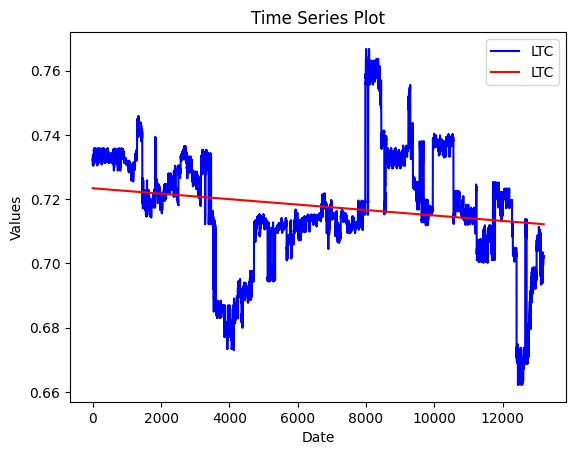

In [13]:
df_trend = pd.DataFrame(X0, columns = crypto_list)

print (len(df_trend))

trend = np.polyfit(np.arange(len(df_trend)), df_trend[crypto_list[2]], 1)
print (trend)

trend_line = np.polyval(trend, np.arange(len(df_trend)))
print (trend_line)

detrended_series = df_trend[crypto_list[2]] - trend_line
print (detrended_series)

fig, ax = plt.subplots()
ax.plot(df_trend.index, df_trend[crypto_list[2]], label = crypto_list[2], color = 'blue')
# ax.plot(df_trend.index, detrended_series, label = crypto_list[2], color = 'red')
ax.plot(df_trend.index, trend_line, label = crypto_list[2], color = 'red')

ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Time Series Plot')
ax.legend()
plt.show()

13200
[-6.51374912e-07  6.71368829e-01]
[0.67136883 0.67136818 0.67136753 ... 0.66277263 0.66277198 0.66277133]
0        0.001051
1        0.001105
2        0.001041
3        0.000915
4        0.001023
           ...   
13195   -0.020454
13196   -0.020409
13197   -0.020256
13198   -0.020995
13199   -0.020677
Name: BTC, Length: 13200, dtype: float64


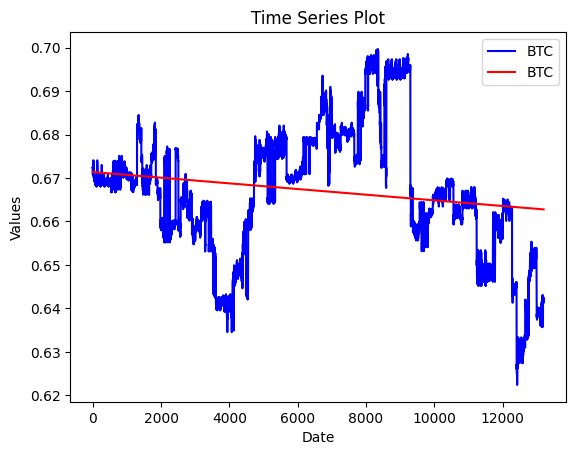

In [16]:
df_trend = pd.DataFrame(X0, columns = crypto_list)

print (len(df_trend))

trend = np.polyfit(np.arange(len(df_trend)), df_trend[crypto_list[3]], 1)
print (trend)

trend_line = np.polyval(trend, np.arange(len(df_trend)))
print (trend_line)

detrended_series = df_trend[crypto_list[3]] - trend_line
print (detrended_series)

fig, ax = plt.subplots()
ax.plot(df_trend.index, df_trend[crypto_list[3]], label = crypto_list[3], color = 'blue')
# ax.plot(df_trend.index, detrended_series, label = crypto_list[3], color = 'green')
ax.plot(df_trend.index, trend_line, label = crypto_list[3], color = 'red')

ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Time Series Plot')
ax.legend()
plt.show()

In [334]:
# 06.05.2024 just helper
values = X_XRP_close.reshape(batch-cnt_thrown_idx, sl)

print (batch-cnt_thrown_idx)
print (values[0])
print (np.mean(values[0]))
print (np.std(values[0]))

100
[0.5185 0.5184 0.5182 0.5184 0.5184 0.5184 0.5184 0.5183 0.5186 0.5194
 0.5187 0.5182 0.5179 0.5177 0.518  0.518  0.5178 0.5179 0.5181 0.5181
 0.5194 0.5181 0.5182 0.5182 0.518  0.5183 0.518  0.518  0.5181 0.5182
 0.5184 0.5192]
0.518296875
0.00040193623172710965


0


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


IndexError: index 1 is out of bounds for axis 0 with size 1

<Figure size 1200x600 with 0 Axes>

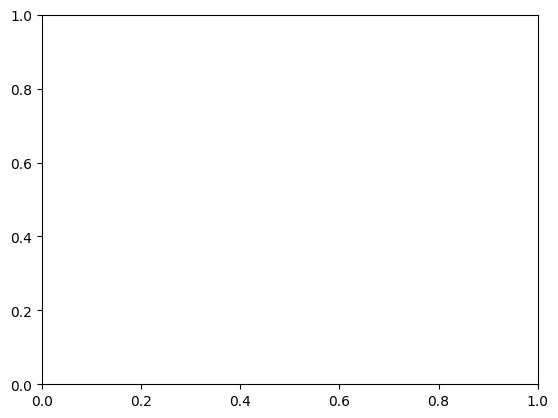

In [83]:
# Figure AutoCorrelations and Partial AutoCorrelations
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for i in range(batch-cnt_thrown_idx-1):
    print (i)
# Plot the autocorrelation function (ACF)    
    plt.figure(figsize = (12, 6))
    plot_acf(values[i], lags = sl-1)
    plt.title('Autocorrelation Function (ACF)')
    plt.show()
    
# Plot the partial autocorrelation function (PACF)
    # plt.figure(figsize = (12, 6))
    # plot_pacf(values[round(i/2)], lags = 60)
    # plt.title('Partial Autocorrelation Function (PACF)')
    # plt.show()

In [17]:
n_steps = sl

# model_4f = Sequential()
# model_4f.add(tf.keras.layers.LSTM(32, activation = 'relu', return_sequences = True, input_shape = (n_steps, n_features)))
# model_4f.add(tf.keras.layers.LSTM(64, activation = 'relu'))
# model_4f.add(tf.keras.layers.Dense(n_features))

# model_4f.compile(optimizer = 'adam', loss = 'mse')

# model_4f.summary()

# fit model
# The number of epochs is the number of complete passes through the training dataset
# history = model_4f.fit(X_detrend, y_detrend, epochs = 100, validation_split = 0.2, verbose = 1)

model_4f = Sequential()
model_4f.add(tf.keras.layers.Input(shape = (n_steps, n_features)))
model_4f.add(tf.keras.layers.LSTM(units = 64, activation = 'relu', return_sequences = True))   
model_4f.add(tf.keras.layers.LSTM(units = 128, activation = 'relu', return_sequences = False))
model_4f.add(tf.keras.layers.Dropout(0.2)) 
model_4f.add(tf.keras.layers.Dense(units = n_out))
# sgd = SGD(clipvalue=1.0)  # Example of gradient clipping
# model_4f.compile(optimizer=sgd, loss='mse')
# sgd = SGD(clipvalue = 1.0, learning_rate = 0.10)
# model_4f.compile(optimizer = sgd, loss = 'mse')
model_4f.compile(optimizer = 'adam', loss = 'mse')
model_4f.summary()

# fit model
# The number of epochs is the number of complete passes through the training dataset
history = model_4f.fit(X_detrend, y_detrend, epochs = 25, 
                       validation_split = 0.2,
                       verbose = 2)
                       # , callbacks=[es])
                       # , callbacks = [TimeStepErrorLogger()])

# # model_8f.add(tf.keras.layers.Dropout(0.2)) 
# model_8f.add(tf.keras.layers.RepeatVector(frwd))
# model_8f.add(tf.keras.layers.LSTM(units = 32, activation = 'relu', return_sequences = True))
# # model_8f.add(tf.keras.layers.Dropout(0.2)) 
# model_8f.add(tf.keras.layers.TimeDistributed(Dense(units = n_out)))

# # Compile the model with MSE loss computed for each time step

# # sgd = SGD(learning_rate = 0.1)
# # model_8f.compile(optimizer = sgd, loss = 'mse')
# model_8f.compile(optimizer = 'adam', loss = 'mean_squared_error')
# model_8f.summary()

# # es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

# # fit model
# # The number of epochs is the number of complete passes through the training dataset
# history = model_8f.fit(X, y, epochs = 500, 
#                        validation_split = 0.2,
#                        verbose = 2)

I0000 00:00:1722890799.900563     638 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722890799.911031     638 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722890799.915018     638 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722890799.919872     638 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 132, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,996 (457.02 KB)

 Trainable params: 116,996 (457.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


I0000 00:00:1722890802.786744     786 service.cc:146] XLA service 0xd554c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722890802.786780     786 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-05 20:46:42.849855: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-05 20:46:43.047378: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at xla_ops.cc:577 : INVALID_ARGUMENT: Incompatible shapes: [32,10,4] vs. [32,4]
	 [[{{node compile_loss/mse/sub}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_3653[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
2024-08-05 20:46:43.047454: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/mse/sub defined at (most recent call last):
<stack traces unavailable>
Incompatible shapes: [32,10,4] vs. [32,4]
	 [[{{node compile_loss/mse/sub}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_3653[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_iterator_3714]

In [19]:
print ("===================================================")
print ("sequence length:  ", sl)

print (batch)
print (cnt_thrown_idx)

print ("batch size:  ", batch-cnt_thrown_idx)
print ("no. of variables:  ", n_features)
print ("no. of predicted variables:  ", n_out)
print ("how many steps forward to predict:  ", frwd)
print ("===================================================")
print ("input shape", X_detrend.shape)
print ("output shape", y_detrend.shape)

sequence length:   132
100
0
batch size:   100
no. of variables:   4
no. of predicted variables:   4
how many steps forward to predict:   10
input shape (100, 132, 4)
output shape (100, 10, 4)


In [18]:
# forward more than one for de-trended model- 07.21.2024
# =======================================================
n_steps = sl

model_8f = Sequential()
model_8f.add(tf.keras.layers.Input(shape = (n_steps, n_features)))
# model_8f.add(tf.keras.layers.LSTM(units = 512, activation = 'relu', return_sequences = False))   


model_8f.add(tf.keras.layers.LSTM(
    units = 512,
    # kernel_initializer = glorot_uniform(),    # Initialize the input weights
    # recurrent_initializer = orthogonal(),     # Initialize the recurrent weights
    # bias_initializer = zeros(),               # Initialize the biases
    activation = 'relu', 
    return_sequences = False
))

# model_8f.add(tf.keras.layers.Dropout(0.2)) 
model_8f.add(tf.keras.layers.RepeatVector(frwd))
model_8f.add(tf.keras.layers.LSTM(units = 256, activation = 'linear', return_sequences = True))
# model_8f.add(tf.keras.layers.Dropout(0.2)) 
model_8f.add(tf.keras.layers.TimeDistributed(Dense(units = n_out)))

# Compile the model with MSE loss computed for each time step

sgd = SGD(learning_rate = 0.1)
model_8f.compile(optimizer = sgd, loss = 'mean_squared_error')
# model_8f.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_8f.summary()

# es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

history = model_8f.fit(X_detrend, y_detrend, epochs = 50, validation_split = 0.2, verbose = 2)

# fit model
# The number of epochs is the number of complete passes through the training dataset
# history = model_8f.fit(X_detrend, y_detrend, epochs = 50, 
#                        validation_split = 0.2,
#                        verbose = 2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 512)            │     1,058,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 10, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 10, 256)        │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 4)          │         1,028 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,847,300 (7.05 MB)

 Trainable params: 1,847,300 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


2024-08-05 20:47:17.051007: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906
2024-08-05 20:47:18.193218: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_69', 76 bytes spill stores, 76 bytes spill loads

2024-08-05 20:47:18.755983: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_69', 8 bytes spill stores, 8 bytes spill loads

2024-08-05 20:47:19.050776: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_72', 20 bytes spill stores, 20 bytes spill loads

2024-08-05 20:47:19.054557: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_72'

3/3 - 12s - 4s/step - loss: 1.4729e-05 - val_loss: 2.9006e-05
Epoch 2/50
3/3 - 0s - 60ms/step - loss: 1.4610e-05 - val_loss: 2.9114e-05
Epoch 3/50
3/3 - 0s - 65ms/step - loss: 1.4532e-05 - val_loss: 2.9055e-05
Epoch 4/50
3/3 - 0s - 57ms/step - loss: 1.4488e-05 - val_loss: 2.8909e-05
Epoch 5/50
3/3 - 0s - 71ms/step - loss: 1.4399e-05 - val_loss: 2.8808e-05
Epoch 6/50
3/3 - 0s - 59ms/step - loss: 1.4350e-05 - val_loss: 2.8800e-05
Epoch 7/50
3/3 - 0s - 74ms/step - loss: 1.4294e-05 - val_loss: 2.8936e-05
Epoch 8/50
3/3 - 0s - 65ms/step - loss: 1.4250e-05 - val_loss: 2.8997e-05
Epoch 9/50
3/3 - 0s - 71ms/step - loss: 1.4187e-05 - val_loss: 2.8836e-05
Epoch 10/50
3/3 - 0s - 69ms/step - loss: 1.4147e-05 - val_loss: 2.8835e-05
Epoch 11/50
3/3 - 0s - 62ms/step - loss: 1.4100e-05 - val_loss: 2.8609e-05
Epoch 12/50
3/3 - 0s - 68ms/step - loss: 1.4068e-05 - val_loss: 2.8590e-05
Epoch 13/50
3/3 - 0s - 69ms/step - loss: 1.4038e-05 - val_loss: 2.8383e-05
Epoch 14/50
3/3 - 0s - 72ms/step - loss: 1.398

In [101]:
print ("input shape", X_detrend.shape)
print ("output shape", y_detrend.shape)

input shape (100, 132, 4)
output shape (100, 10, 4)


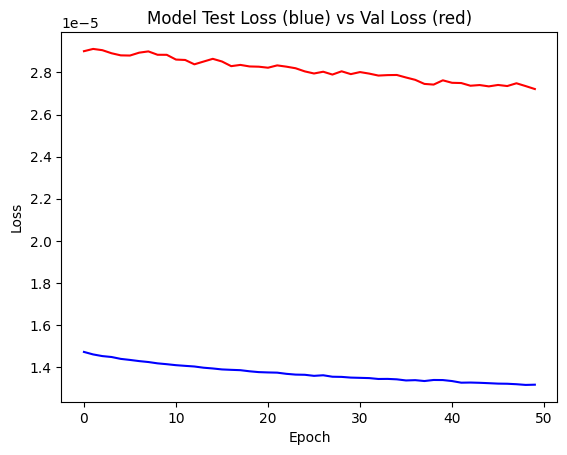

In [20]:
# Create a figure and axis object
fig, ax = plt.subplots(1, 1)

# Plot the data
ax.plot(history.history['loss'], 'blue')
ax.plot(history.history['val_loss'], 'red')

# Customize the plot
ax.set_title('Model Test Loss (blue) vs Val Loss (red)')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

plt.show()

In [162]:
# Extract weights from the LSTM layer
lstm_layer = model_4f.layers[0]
lstm_weights = lstm_layer.get_weights()

In [251]:
kernel, recurrent_kernel, bias = lstm_weights

# Print the shapes
print(f"Kernel shape: {kernel.shape}")
print(f"Recurrent Kernel shape: {recurrent_kernel.shape}")
print(f"Bias shape: {bias.shape}")

Kernel shape: (4, 8)
Recurrent Kernel shape: (2, 8)
Bias shape: (8,)


In [164]:
# Print the weights
print("Kernel weights:", kernel)
print("Recurrent kernel weights:", recurrent_kernel)
print("Bias weights:", bias)

Kernel weights: [[-0.29570043 -0.5004754   0.20667636  0.10042548  0.53247315  0.3485367
   0.06583369  0.30498368]
 [-0.0952394   0.6267162  -0.5430347  -0.11614949 -0.14094801  0.45296112
   0.46237165 -0.5539824 ]
 [-0.6704555  -0.32267913 -0.02672264 -0.01044066 -0.55034953 -0.5247029
  -0.39970452 -0.2879326 ]
 [-0.4440828  -0.69091105  0.5708396  -0.62216336  0.01680009  0.60691565
   0.504008   -0.2612597 ]]
Recurrent kernel weights: [[-0.48168886  0.55765843 -0.29909894 -0.32422814 -0.07709108  0.16607761
  -0.40783387 -0.2501138 ]
 [-0.4924853  -0.33605534  0.23202763  0.33475357 -0.5284006   0.42610377
   0.03789801 -0.12824975]]
Bias weights: [-1.3965615e-05 -1.7603061e-06  9.9997938e-01  9.9999720e-01
 -1.3367771e-03 -2.4126284e-05 -1.4065922e-05 -1.7748447e-06]


In [21]:
#  Validation Set - Helper

# Reset Index
sample_valid = sample_valid.reset_index(drop = True)
sample_size = sample_valid.shape[0]
print ('sample_size: ', sample_size)
# sample_valid.head()
# sl = 8  # <--- sequence length
batch_valid = 2  # <--- batch size
# n_features = 8 # <---- no. of variables
# n_out = 1 # <----- no. of predicted variables
# frwd = 1  # <--- how many to predict

# Trimming Indices !!!
# Marking selected rows
sample_valid['Selected'] = 0


# Trimming Indices !!!
# Marking selected rows
sample_valid.loc[:, 'Selected'] = 0

# Selecting m random rows without replacement
np.random.seed(125)
selected_indices = np.random.choice(sample_valid.index, size = batch_valid, replace = False)

sample_valid.loc[selected_indices, 'Selected'] = 1 

chosen_idx = sample_valid[sample_valid['Selected'] == 1].index

cnt_thrown_idx1 = 0
cnt_thrown_idx2 = 0

for idx in chosen_idx:    
    if (idx-(sl-1) < 0):
       # print ('scratch index on a left:  ', idx)
       cnt_thrown_idx1 = cnt_thrown_idx1 + 1
       # print ('cnt_thrown_idx1:  ', cnt_thrown_idx1)
       chosen_idx = chosen_idx.drop(idx)
       # print (chosen_idx)

for idx in chosen_idx:
    if (idx+(frwd+1) > sample_size):
       # print ('scratch index on a right:  ', idx)
       cnt_thrown_idx2 = cnt_thrown_idx2 + 1
       # print ('cnt_thrown_idx2:  ', cnt_thrown_idx2)
       chosen_idx = chosen_idx.drop(idx)
       # print (chosen_idx)

cnt_thrown_idx = cnt_thrown_idx1 + cnt_thrown_idx2

print ('cnt_thrown_idx = ', cnt_thrown_idx)

sample_size:  4311
cnt_thrown_idx =  0


In [22]:
# De-Trend Model
# variables are close and volume

#  Validation Set - 07.21.2024
# ============================
# Reset Index
sample_valid = sample_valid.reset_index(drop = True)
sample_size = sample_valid.shape[0]
print ('sample_size: ', sample_size)
# sample_valid.head()
# sl = 8  # <--- sequence length
batch_valid = 2  # <--- batch size
# n_features = 8 # <---- no. of variables
# n_out = 1 # <----- no. of predicted variables
# frwd = 1  # <--- how many to predict

## Trimming Indices !!!
# Marking selected rows
sample_valid.loc[:, 'Selected'] = 0

# Selecting m random rows without replacement
np.random.seed(125)
selected_indices = np.random.choice(sample_valid.index, size = batch_valid, replace = False)

sample_valid.loc[selected_indices, 'Selected'] = 1 

chosen_idx = sample_valid[sample_valid['Selected'] == 1].index

cnt_thrown_idx1 = 0
cnt_thrown_idx2 = 0

for idx in chosen_idx:    
    if (idx-(sl-1) < 0):
       # print ('scratch index on a left:  ', idx)
       cnt_thrown_idx1 = cnt_thrown_idx1 + 1
       # print ('cnt_thrown_idx1:  ', cnt_thrown_idx1)
       chosen_idx = chosen_idx.drop(idx)
       # print (chosen_idx)

for idx in chosen_idx:
    if (idx+(frwd+1) > sample_size):
       # print ('scratch index on a right:  ', idx)
       cnt_thrown_idx2 = cnt_thrown_idx2 + 1
       # print ('cnt_thrown_idx2:  ', cnt_thrown_idx2)
       chosen_idx = chosen_idx.drop(idx)
       # print (chosen_idx)

cnt_thrown_idx = cnt_thrown_idx1 + cnt_thrown_idx2

print ('cnt_thrown_idx = ', cnt_thrown_idx)

print ('Selected Indices: ')
print (selected_indices)
# print ('=============================================')

all_ts_close_xrp = np.empty((1, )) # final input/output
all_ts_close_eth = np.empty((1, )) # final input/output
all_ts_close_ltc = np.empty((1, )) # final input/output
all_ts_close_btc = np.empty((1, )) # final input/output

aft_ts_close_xrp = np.empty((1))
aft_ts_close_eth = np.empty((1))
aft_ts_close_ltc = np.empty((1))
aft_ts_close_btc = np.empty((1))

# print (all_ts_close_btc)
# print (aft_ts_close_btc)

for idx in chosen_idx:
  selected_rows_before = sample_valid.iloc[max(0, idx-sl): idx]
  selected_rows_after = sample_valid.iloc[max(0, idx): idx+frwd]
  # print ('idx:  ', idx)

  # xrp
  sr_before_close_xrp = np.array(selected_rows_before['close_xrp'])
  sr_after_close_xrp = np.array(selected_rows_after['close_xrp'])    
  # print (sr_before_close_xrp)
  sr_before_volume_xrp = np.array(selected_rows_before['volume_xrp'])
  sr_after_volume_xrp = np.array(selected_rows_after['volume_xrp'])    
  # print (sr_before_volume_xrp)  

# Compute the weighted average
  weighted_avg_xrp = np.average(sr_after_close_xrp, weights = sr_after_volume_xrp)
  # print ('XRP w.average:  ', weighted_avg_xrp)

# eth
  sr_before_close_eth = np.array(selected_rows_before['close_eth'])
  sr_after_close_eth = np.array(selected_rows_after['close_eth'])
  sr_before_volume_eth = np.array(selected_rows_before['volume_eth'])
  sr_after_volume_eth = np.array(selected_rows_after['volume_eth'])

# Compute the weighted average
  weighted_avg_eth = np.average(sr_after_close_eth, weights = sr_after_volume_eth)
  # print ('ETH w.average:  ', weighted_avg_eth)
    
# ltc
  sr_before_close_ltc = np.array(selected_rows_before['close_ltc'])
  sr_after_close_ltc = np.array(selected_rows_after['close_ltc'])
  sr_before_volume_ltc = np.array(selected_rows_before['volume_ltc'])
  sr_after_volume_ltc = np.array(selected_rows_after['volume_ltc'])

# Compute the weighted average
  weighted_avg_ltc = np.average(sr_after_close_ltc, weights = sr_after_volume_ltc)
  # print ('LTC w.average:  ', weighted_avg_ltc)

# btc
  sr_before_close_btc = np.array(selected_rows_before['close_btc'])
  sr_after_close_btc = np.array(selected_rows_after['close_btc'])
  sr_before_volume_btc = np.array(selected_rows_before['volume_btc'])
  sr_after_volume_btc = np.array(selected_rows_after['volume_btc'])

# Compute the weighted average
  weighted_avg_btc = np.average(sr_after_close_btc, weights = sr_after_volume_btc)
  # print ('BTC w.average:  ', weighted_avg_btc)

# xrp
  all_ts_close_xrp = np.concatenate((all_ts_close_xrp, sr_before_close_xrp))
  all_ts_volume_xrp = np.concatenate((all_ts_volume_xrp, sr_before_volume_xrp))
# eth
  all_ts_close_eth = np.concatenate((all_ts_close_eth, sr_before_close_eth))
  all_ts_volume_eth = np.concatenate((all_ts_volume_eth, sr_before_volume_eth))
# ltc
  all_ts_close_ltc = np.concatenate((all_ts_close_ltc, sr_before_close_ltc))
  all_ts_volume_ltc = np.concatenate((all_ts_volume_ltc, sr_before_volume_ltc))
# btc
  all_ts_close_btc = np.concatenate((all_ts_close_btc, sr_before_close_btc))
  all_ts_volume_btc = np.concatenate((all_ts_volume_btc, sr_before_volume_btc))

  aft_ts_close_xrp = np.concatenate((aft_ts_close_xrp, sr_after_close_xrp))
  aft_ts_close_eth = np.concatenate((aft_ts_close_eth, sr_after_close_eth))
  aft_ts_close_ltc = np.concatenate((aft_ts_close_ltc, sr_after_close_ltc))
  aft_ts_close_btc = np.concatenate((aft_ts_close_btc, sr_after_close_btc))

X_XRP_close = all_ts_close_xrp[1:]
X_XRP_volume = all_ts_volume_xrp[1:]

X_ETH_close = all_ts_close_eth[1:]
X_ETH_volume = all_ts_volume_eth[1:]

X_LTC_close = all_ts_close_ltc[1:]
X_LTC_volume = all_ts_volume_ltc[1:]

X_BTC_close = all_ts_close_btc[1:]
X_BTC_volume = all_ts_volume_btc[1:]

# X0 = np.column_stack((X_XRP_close, X_XRP_volume, 
#                       X_ETH_close, X_ETH_volume, 
#                       X_LTC_close, X_LTC_volume, 
#                       X_BTC_close, X_BTC_volume))

X0_valid = np.column_stack((X_XRP_close,
                            X_ETH_close,
                            X_LTC_close,
                            X_BTC_close))
# print (X0)

# ======== Model Input =========
X_valid = X0_valid.reshape(batch_valid-cnt_thrown_idx, sl, n_features)
# print ('================ original series =================')    
# print ('XXXX ====== Actual Input ====== XXXX')
# print (X)
# print (X.shape)

print ('================== trend lines ===================')   

y_XRP = aft_ts_close_xrp[1:]
y_ETH = aft_ts_close_eth[1:]
y_LTC = aft_ts_close_ltc[1:]
y_BTC = aft_ts_close_btc[1:]
# print ('y_BTC:  ', y_BTC)

y_valid = np.column_stack((y_XRP, y_ETH, y_LTC, y_BTC))
# print (y)

y_valid = y_valid.reshape(batch_valid-cnt_thrown_idx, frwd, n_out)
# print ('YYYY ====== Actual Input ====== YYYY')
# print (y)
# print (y.shape)

def detrend_series(series):
    trend = np.polyfit(np.arange(len(series)), series.values, 1)
    trend_line = np.polyval(trend, np.arange(len(series)))
    detrended_series = series - trend_line
    return detrended_series

crypto_list = ['XRP', 'ETH', 'LTC', 'BTC']

X_valid_trend = np.zeros((batch_valid-cnt_thrown_idx, sl, n_features))
# print ('X_trend')
# print (X_trend)

X_valid_detrend = np.zeros((batch_valid-cnt_thrown_idx, sl, n_features))
# print ('X_detrend')
# print (X_detrend)

y_valid_trend = np.zeros((batch_valid-cnt_thrown_idx, frwd, n_out))
# print ('y_trend')
# print (y_trend)

for j in range(batch_valid-cnt_thrown_idx):
    # print ('      ')
    # print ('     j = ', j)
    df_trend = pd.DataFrame(X_valid[j], columns = crypto_list)
    # print ('df_trend:  ', df_trend)
 
# XRP
    coef_xrp = np.polyfit(np.arange(len(df_trend)), df_trend['XRP'], 1)
    print ("coef_xrp:  ", coef_xrp) 
    trend_line_xrp = np.polyval(coef_xrp, np.arange(len(df_trend)))
    detrended_series_xrp = df_trend['XRP'] - trend_line_xrp
    detrend_xrp = detrended_series_xrp.to_numpy()  

    y_xrp_trend = np.empty(frwd)
    # print ('y_xrp_trend:  ', y_xrp_trend)
    for f in range(frwd):
        y_xrp_trend[f] = coef_xrp[0]*(len(df_trend)+f) + coef_xrp[1] 
        print (y_xrp_trend[f])

    # ETH
    coef_eth = np.polyfit(np.arange(len(df_trend)), df_trend['ETH'], 1)
    print ("coef_eth:  ", coef_eth)
    trend_line_eth = np.polyval(coef_eth, np.arange(len(df_trend)))
    detrended_series_eth = df_trend['ETH'] - trend_line_eth
    detrend_eth = detrended_series_eth.to_numpy()

    y_eth_trend = np.empty(frwd)
    # print ('y_eth_trend:  ', y_eth_trend)
    for f in range(frwd):
        y_eth_trend[f] = coef_eth[0]*(len(df_trend)+f) + coef_eth[1] 
        print (y_eth_trend[f])
  
# LTC    
    coef_ltc = np.polyfit(np.arange(len(df_trend)), df_trend['LTC'], 1)
    print ("coef_ltc:  ", coef_ltc)
    trend_line_ltc = np.polyval(coef_ltc, np.arange(len(df_trend)))
    detrended_series_ltc = df_trend['LTC'] - trend_line_ltc
    detrend_ltc = detrended_series_ltc.to_numpy()

    y_ltc_trend = np.empty(frwd)
    # print ('y_ltc_trend:  ', y_ltc_trend)
    for f in range(frwd):
        y_ltc_trend[f] = coef_ltc[0]*(len(df_trend) + f) + coef_ltc[1] 
        print (y_ltc_trend[f])

# BTC    
    coef_btc = np.polyfit(np.arange(len(df_trend)), df_trend['BTC'], 1)
    # print ('df_trend[BTC]:   ', df_trend['BTC'])
    print ("coef_btc:  ", coef_btc)
    trend_line_btc = np.polyval(coef_btc, np.arange(len(df_trend)))
    detrended_series_btc = df_trend['BTC'] - trend_line_btc
    detrend_btc = detrended_series_btc.to_numpy()

    y_btc_trend = np.empty(frwd)
    
    print ('y_btc_trend:  ', y_btc_trend)
    
    for f in range(frwd):
        
        y_btc_trend[f] = coef_btc[0]*(len(df_trend) + f) + coef_btc[1] 
        print ('f:  ', f)
        print (len(df_trend) + f)
        print (y_btc_trend[f])
        

    # print ('y_btc_trend:  ', y_btc_trend)
    # print ('type of y_btc_trend:  ', type (y_btc_trend))
        
    # Create a dictionary with the data
    trend_dict = {'XRP' : trend_line_xrp, 
                  'ETH' : trend_line_eth, 
                  'LTC' : trend_line_ltc, 
                  'BTC' : trend_line_btc
                 }
    df = pd.DataFrame(trend_dict)
    
    # Fill the DataFrame column by column
    for col, values in trend_dict.items():
        df[col] = values
    
    X0_valid_trend = df.to_numpy()
 
    X_valid_trend[j] += X0_valid_trend 

    detrend_dict = {'XRP' : detrend_xrp, 
                    'ETH' : detrend_eth, 
                    'LTC' : detrend_ltc, 
                    'BTC' : detrend_btc
                   }
    
    df = pd.DataFrame(detrend_dict)

    # Fill the DataFrame column by column
    for col, values in detrend_dict.items():
        df[col] = values

    X0_valid_detrend = df.to_numpy()

    X_valid_detrend[j] += X0_valid_detrend 
    
    # Create a dictionary with the data
    # y_trend_dict = {'XRP' : np.array([y_xrp_trend]), 
    #                 'ETH' : np.array([y_eth_trend]), 
    #                 'LTC' : np.array([y_ltc_trend]), 
    #                 'BTC' : np.array([y_btc_trend])
    #                }

    # Create a dictionary with the data
    y_valid_trend_dict = {'XRP' : y_xrp_trend, 
                          'ETH' : y_eth_trend, 
                          'LTC' : y_ltc_trend, 
                          'BTC' : y_btc_trend
                         }
    # print (y_valid_trend_dict)

    df1 = pd.DataFrame(y_valid_trend_dict)

    # print (' df1 ')
    # print (df1)
    # print (df1.shape)
    # print ('  ')
    
    # Fill the DataFrame column by column
    for key, value in y_valid_trend_dict.items():
        # print(f"{key}: {value}")
        df1[key] = value

    y_valid_tr = df1.to_numpy()
    y_valid_trend[j] += y_valid_tr

print ('YYYY ====== Actual Input ====== YYYY')
print (y_valid)
print (y_valid.shape)

print ('YYYY ====== Trend Input ======= YYYY')
print (y_valid_trend)
print (type(y_valid_trend))
print (y_valid_trend.shape)

print ('YYYY ====== De-Trend Input ======= YYYY')
y_valid_detrend = y_valid - y_valid_trend
print (y_valid_detrend)
# print (type(y_detrend))
# print (y_detrend.shape)


sample_size:  4311
cnt_thrown_idx =  0
Selected Indices: 
[3504 1313]
================== trend lines ===================
coef_xrp:   [3.38763286e-06 5.67421292e-01]
0.5678684594031922
0.5678718470360494
0.5678752346689068
0.567878622301764
0.5678820099346213
0.5678853975674786
0.5678887852003359
0.5678921728331933
0.5678955604660505
0.5678989480989078
coef_eth:   [5.39484642e-06 3.14105872e-01]
0.3148179921350914
0.3148233869815065
0.3148287818279217
0.3148341766743368
0.3148395715207519
0.3148449663671671
0.31485036121358223
0.3148557560599973
0.3148611509064125
0.31486654575282763
coef_ltc:   [-8.92759310e-06  6.79898394e-01]
0.6787199514226231
0.6787110238295252
0.6787020962364273
0.6786931686433293
0.6786842410502314
0.6786753134571334
0.6786663858640355
0.6786574582709375
0.6786485306778396
0.6786396030847417
coef_btc:   [2.40335888e-05 6.40259123e-01]
y_btc_trend:   [0.00105077 0.00110492 0.00104107 0.00091483 0.00102298 0.02045414
 0.02040909 0.02025643 0.02099478 0.02067653]
f:

In [23]:
print (X_valid_trend)

[[[0.56742129 0.31410587 0.67989839 0.64025912]
  [0.56742468 0.31411127 0.67988947 0.64028316]
  [0.56742807 0.31411666 0.67988054 0.64030719]
  ...
  [0.5678583  0.31480181 0.67874673 0.64335946]
  [0.56786168 0.3148072  0.67873781 0.64338349]
  [0.56786507 0.3148126  0.67872888 0.64340752]]

 [[0.52718319 0.28325657 0.62842861 0.58842612]
  [0.52713459 0.28313199 0.62830298 0.58835563]
  [0.52708599 0.28300741 0.62817735 0.58828515]
  ...
  [0.52091401 0.26718583 0.61222265 0.5793332 ]
  [0.52086541 0.26706125 0.61209702 0.57926271]
  [0.52081681 0.26693667 0.61197139 0.57919222]]]


In [24]:
y_valid_detrend = y_valid_detrend.reshape(batch_valid-cnt_thrown_idx, frwd, n_out)
print ('y_valid_detrend')
print (type(y_valid_detrend))
print (y_valid_detrend.shape)
print (y_valid_detrend)
# print (y_valid[0:10])

y_hat_detrend = model_8f.predict(X_valid_detrend, verbose = 1)
print ('y_hat_detrend')
print (type(y_hat_detrend))
print (y_hat_detrend.shape)
print (y_hat_detrend)
# y_hat_detrend.reshape(batch_valid-cnt_thrown_idx, frwd)
# print (sl)

y_valid_detrend
<class 'numpy.ndarray'>
(2, 10, 4)
[[[ 3.83154060e-03 -5.51992135e-04  2.48004858e-03 -2.35495638e-03]
  [ 1.72815296e-03 -6.35386982e-04  1.38897617e-03 -1.63108997e-03]
  [ 2.42476533e-03 -9.24781828e-04  1.09790376e-03 -1.79372356e-03]
  [ 2.02137770e-03 -9.99176674e-04  1.10683136e-03 -1.89835715e-03]
  [ 6.17990065e-04 -1.26557152e-03  6.15758950e-04 -2.94039074e-03]
  [ 4.14602433e-04 -1.36496637e-03  5.24686543e-04 -3.03592433e-03]
  [-4.88785200e-04 -1.49336121e-03  3.33614136e-04 -3.21195792e-03]
  [-9.21728332e-05 -1.13875606e-03  1.42541729e-04 -3.04119151e-03]
  [-1.69556047e-03 -1.32515091e-03 -1.74853068e-03 -3.46772510e-03]
  [-3.98948099e-04 -1.22154575e-03 -2.13960308e-03 -3.14165868e-03]]

 [[ 3.13178348e-03  2.39890655e-03  9.55423317e-03  4.23666768e-03]
  [ 2.98038173e-03  2.80048591e-03  2.17986074e-03 -4.60144513e-04]
  [ 4.52897998e-03  2.98506528e-03  1.07054883e-02  4.94924329e-03]
  [ 4.07757823e-03  2.93164464e-03  1.09311159e-02  4.07563109e

In [25]:
print ('y_valid_detrend')
print (y_valid_detrend[0])
print ('')
print ('y_hat_detrend')
print (y_hat_detrend[0])

y_valid_detrend
[[ 3.83154060e-03 -5.51992135e-04  2.48004858e-03 -2.35495638e-03]
 [ 1.72815296e-03 -6.35386982e-04  1.38897617e-03 -1.63108997e-03]
 [ 2.42476533e-03 -9.24781828e-04  1.09790376e-03 -1.79372356e-03]
 [ 2.02137770e-03 -9.99176674e-04  1.10683136e-03 -1.89835715e-03]
 [ 6.17990065e-04 -1.26557152e-03  6.15758950e-04 -2.94039074e-03]
 [ 4.14602433e-04 -1.36496637e-03  5.24686543e-04 -3.03592433e-03]
 [-4.88785200e-04 -1.49336121e-03  3.33614136e-04 -3.21195792e-03]
 [-9.21728332e-05 -1.13875606e-03  1.42541729e-04 -3.04119151e-03]
 [-1.69556047e-03 -1.32515091e-03 -1.74853068e-03 -3.46772510e-03]
 [-3.98948099e-04 -1.22154575e-03 -2.13960308e-03 -3.14165868e-03]]

y_hat_detrend
[[ 0.00028378 -0.00016613 -0.00046407 -0.00014485]
 [ 0.00033958 -0.00016847 -0.0004529  -0.00014778]
 [ 0.00038485 -0.00016591 -0.00043705 -0.00014963]
 [ 0.00042087 -0.0001613  -0.00042055 -0.00015049]
 [ 0.00044897 -0.00015614 -0.00040538 -0.00015061]
 [ 0.00047049 -0.00015118 -0.00039236 -0.00

In [ ]:
''' help with pictures - only BTC 07.23.2024 '''

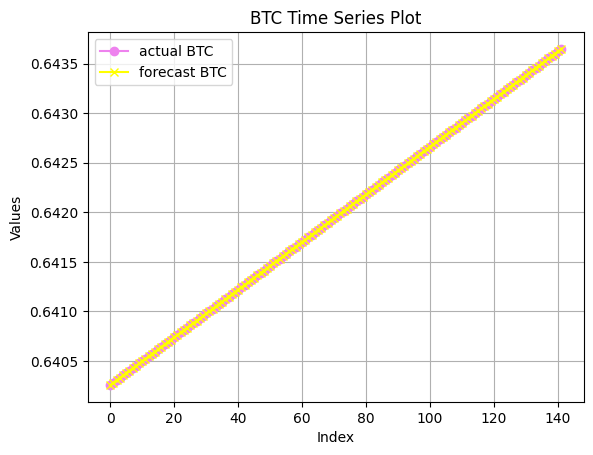

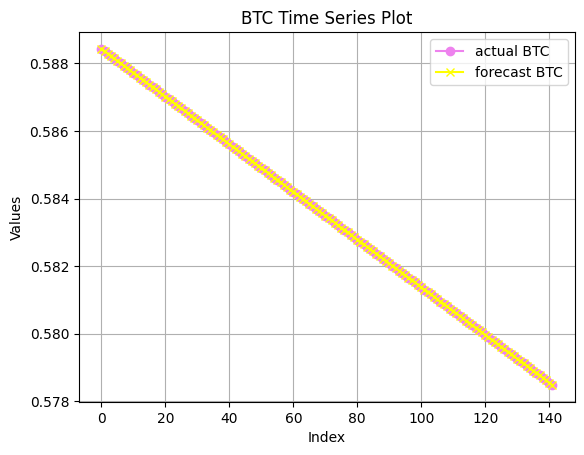

In [26]:
for i in range(batch_valid-cnt_thrown_idx):
    actual = pd.concat([pd.DataFrame(X_valid_trend[i], columns = ['XRP', 'ETH', 'LTC', 'BTC']),  
                        pd.DataFrame(y_valid_trend[i].reshape(frwd, n_features), columns = ['XRP', 'ETH', 'LTC', 'BTC'])], 
                        ignore_index = True)
    # print(actual)
    forecast = pd.concat([pd.DataFrame(X_valid_trend[i], columns = ['XRP', 'ETH', 'LTC', 'BTC']),  
                          pd.DataFrame(y_valid_trend[i].reshape(frwd, n_features), columns = ['XRP', 'ETH', 'LTC', 'BTC'])], 
                          ignore_index = True)
    # print(forecast)

# =================== BTC ========================
    fig, ax = plt.subplots()
    ax.plot(actual.index, actual['BTC'], label = 'actual BTC', marker = 'o', color = 'violet')
    ax.plot(forecast.index, forecast['BTC'], label = 'forecast BTC', marker = 'x', color = 'yellow')
    # Add labels and a title
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.set_title('BTC Time Series Plot')
    ax.legend() # Add legend
    ax.grid(True) # Add grid
    plt.show()

          XRP       ETH       LTC       BTC
0    0.005779  0.000538  0.001202  0.000403
1    0.005275  0.000368  0.001211  0.000581
2    0.005472  0.000071  0.001419  0.000376
3    0.006369  0.000623  0.002528  0.000752
4    0.005565  0.000344  0.002037  0.000353
..        ...       ...       ...       ...
137  0.000415 -0.001365  0.000525 -0.003036
138 -0.000489 -0.001493  0.000334 -0.003212
139 -0.000092 -0.001139  0.000143 -0.003041
140 -0.001696 -0.001325 -0.001749 -0.003468
141 -0.000399 -0.001222 -0.002140 -0.003142

[142 rows x 4 columns]
          XRP       ETH       LTC       BTC
0    0.005779  0.000538  0.001202  0.000403
1    0.005275  0.000368  0.001211  0.000581
2    0.005472  0.000071  0.001419  0.000376
3    0.006369  0.000623  0.002528  0.000752
4    0.005565  0.000344  0.002037  0.000353
..        ...       ...       ...       ...
137  0.000470 -0.000151 -0.000392 -0.000150
138  0.000487 -0.000147 -0.000382 -0.000150
139  0.000499 -0.000143 -0.000373 -0.000149
140  0.0

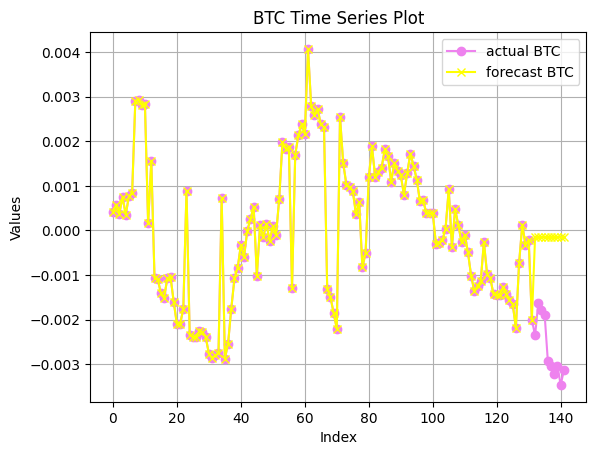

          XRP       ETH       LTC       BTC
0    0.002417 -0.001171 -0.000229  0.000763
1    0.002965 -0.000768  0.000197  0.000894
2   -0.000886 -0.001080 -0.000377  0.001233
3    0.002863 -0.000395  0.000448  0.001177
4    0.002911 -0.000182  0.000474  0.001262
..        ...       ...       ...       ...
137  0.005575  0.004257  0.013582  0.005612
138  0.005323  0.004155  0.012908  0.005672
139  0.004572  0.004115  0.012534  0.005446
140  0.004821  0.004000  0.013659  0.005360
141  0.004569  0.004361  0.012385  0.005355

[142 rows x 4 columns]
          XRP       ETH       LTC       BTC
0    0.002417 -0.001171 -0.000229  0.000763
1    0.002965 -0.000768  0.000197  0.000894
2   -0.000886 -0.001080 -0.000377  0.001233
3    0.002863 -0.000395  0.000448  0.001177
4    0.002911 -0.000182  0.000474  0.001262
..        ...       ...       ...       ...
137  0.000959  0.000282  0.000469  0.000388
138  0.001008  0.000312  0.000537  0.000418
139  0.001045  0.000335  0.000591  0.000440
140  0.0

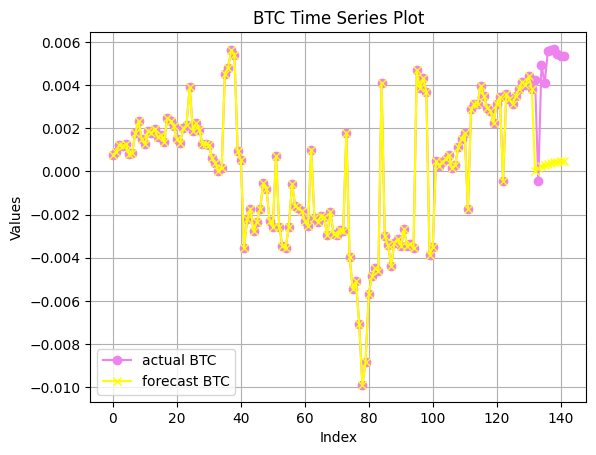

In [27]:
for i in range(batch_valid-cnt_thrown_idx):
    actual = pd.concat([pd.DataFrame(X_valid_detrend[i], columns = ['XRP', 'ETH', 'LTC', 'BTC']),  
                        pd.DataFrame(y_valid_detrend[i].reshape(frwd, n_features), columns = ['XRP', 'ETH', 'LTC', 'BTC'])], 
                        ignore_index = True)
    print(actual)
    forecast = pd.concat([pd.DataFrame(X_valid_detrend[i], columns = ['XRP', 'ETH', 'LTC', 'BTC']),  
                          pd.DataFrame(y_hat_detrend[i].reshape(frwd, n_features), columns = ['XRP', 'ETH', 'LTC', 'BTC'])], 
                          ignore_index = True)
    print(forecast)

# =================== BTC ========================
    fig, ax = plt.subplots()
    ax.plot(actual.index, actual['BTC'], label = 'actual BTC', marker = 'o', color = 'violet')
    ax.plot(forecast.index, forecast['BTC'], label = 'forecast BTC', marker = 'x', color = 'yellow')
    # Add labels and a title
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.set_title('BTC Time Series Plot')
    ax.legend() # Add legend
    ax.grid(True) # Add grid
    plt.show()

0


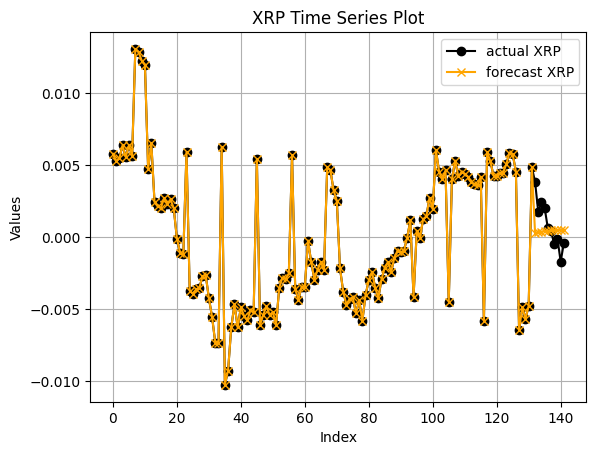

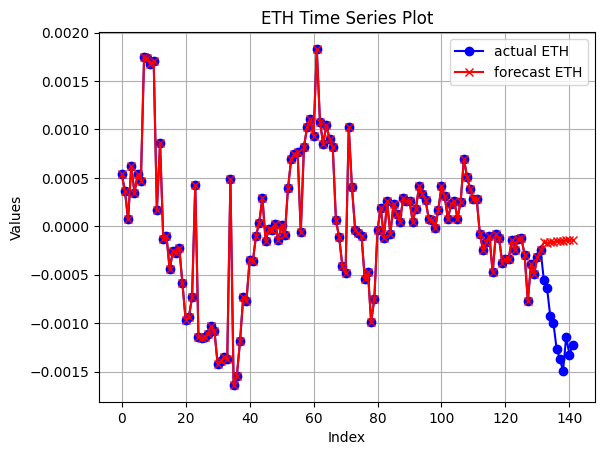

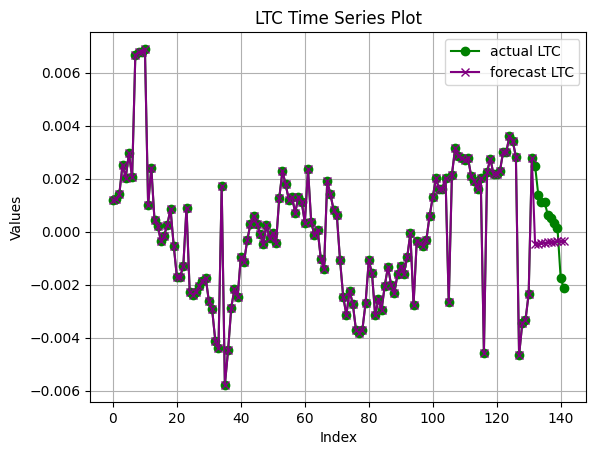

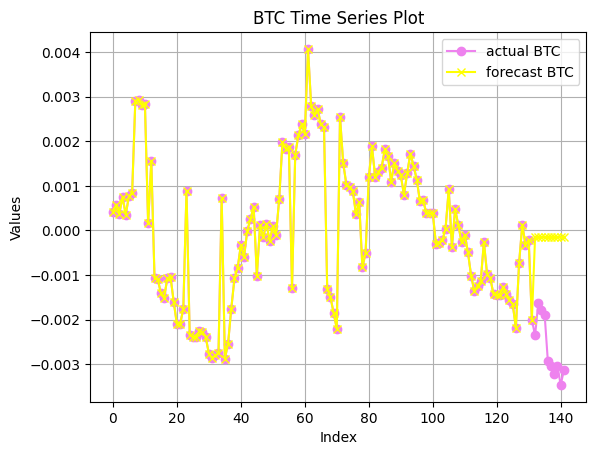

1


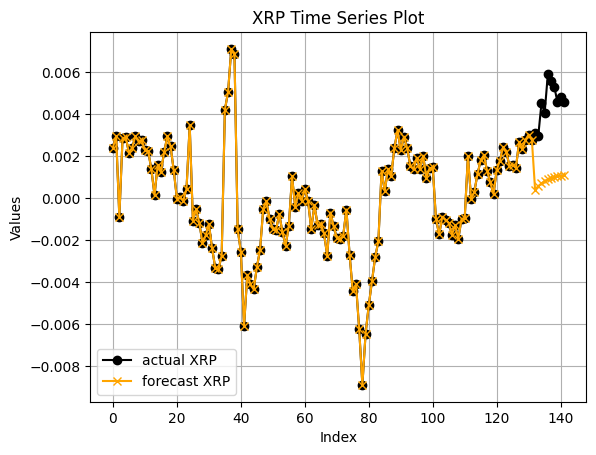

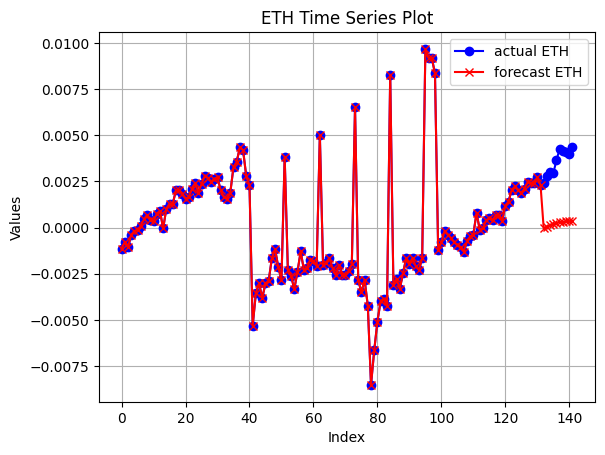

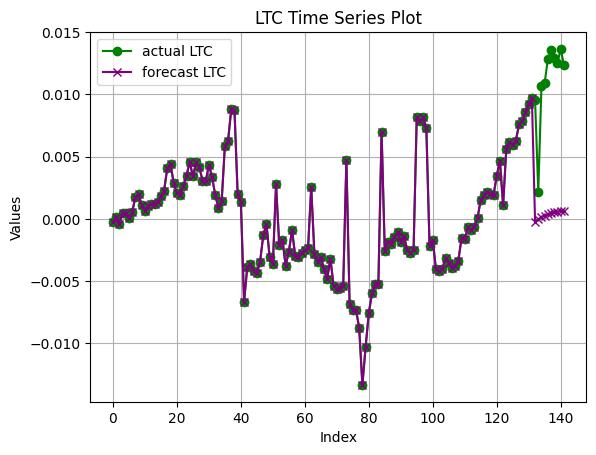

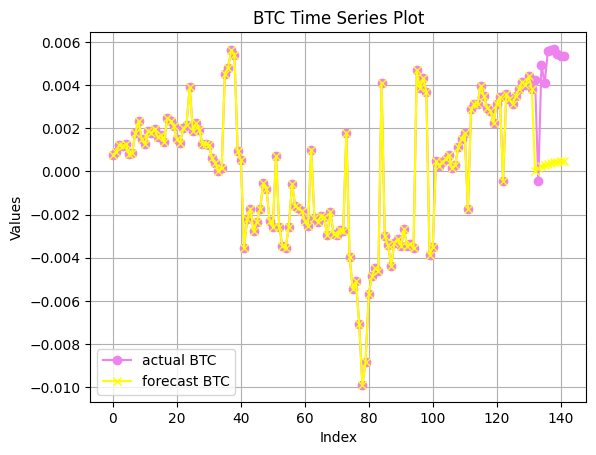

In [28]:
for i in range(batch_valid-cnt_thrown_idx):
    actual = pd.concat([pd.DataFrame(X_valid_detrend[i], columns = ['XRP', 'ETH', 'LTC', 'BTC']),  
                        pd.DataFrame(y_valid_detrend[i].reshape(frwd, n_features), columns = ['XRP', 'ETH', 'LTC', 'BTC'])], 
                        ignore_index = True)
    # print(actual)
    forecast = pd.concat([pd.DataFrame(X_valid_detrend[i], columns = ['XRP', 'ETH', 'LTC', 'BTC']),  
                          pd.DataFrame(y_hat_detrend[i].reshape(frwd, n_features), columns = ['XRP', 'ETH', 'LTC', 'BTC'])], 
                          ignore_index = True)
    # print(forecast)
    print (i)
# =================== XPR ======================== 
    fig, ax = plt.subplots()
    ax.plot(actual.index, actual['XRP'], label = 'actual XRP', marker = 'o', color = 'black')
    ax.plot(forecast.index, forecast['XRP'], label = 'forecast XRP', marker = 'x', color = 'orange')
    # Add labels and a title
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.set_title('XRP Time Series Plot')
    ax.legend() # Add legend
    ax.grid(True) # Add grid
    plt.show()
# =================== ETH ========================
    fig, ax = plt.subplots()
    ax.plot(actual.index, actual['ETH'], label = 'actual ETH', marker = 'o', color = 'blue')
    ax.plot(forecast.index, forecast['ETH'], label = 'forecast ETH', marker = 'x', color = 'red')
    # Add labels and a title
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.set_title('ETH Time Series Plot')
    ax.legend() # Add legend
    ax.grid(True) # Add grid
    plt.show()
# =================== LTC ========================
    fig, ax = plt.subplots()
    ax.plot(actual.index, actual['LTC'], label = 'actual LTC', marker = 'o', color = 'green')
    ax.plot(forecast.index, forecast['LTC'], label = 'forecast LTC', marker = 'x', color = 'purple')
    # Add labels and a title
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.set_title('LTC Time Series Plot')
    ax.legend() # Add legend
    ax.grid(True) # Add grid
    plt.show()
# =================== BTC ========================
    fig, ax = plt.subplots()
    ax.plot(actual.index, actual['BTC'], label = 'actual BTC', marker = 'o', color = 'violet')
    ax.plot(forecast.index, forecast['BTC'], label = 'forecast BTC', marker = 'x', color = 'yellow')
    # Add labels and a title
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.set_title('BTC Time Series Plot')
    ax.legend() # Add legend
    ax.grid(True) # Add grid
    plt.show()

In [ ]:
# 07.16.2024
# add trend back

In [29]:
y_valid_trend = y_valid_trend.reshape(batch_valid-cnt_thrown_idx, frwd, n_out)
print ('y_valid_trend')
print (type(y_valid_trend))
print (y_valid_trend.shape)
print (y_valid_trend)

print ('y_hat_detrend')
print (type(y_hat_detrend))
print (y_hat_detrend.shape)
print (y_hat_detrend)

y_hat = y_valid_trend + y_hat_detrend
print ('y_hat')
print (type(y_hat))
print (y_hat.shape)
print (y_hat)

y_valid_trend
<class 'numpy.ndarray'>
(2, 10, 4)
[[[0.56786846 0.31481799 0.67871995 0.64343156]
  [0.56787185 0.31482339 0.67871102 0.64345559]
  [0.56787523 0.31482878 0.6787021  0.64347962]
  [0.56787862 0.31483418 0.67869317 0.64350366]
  [0.56788201 0.31483957 0.67868424 0.64352769]
  [0.5678854  0.31484497 0.67867531 0.64355172]
  [0.56788879 0.31485036 0.67866639 0.64357576]
  [0.56789217 0.31485576 0.67865746 0.64359979]
  [0.56789556 0.31486115 0.67864853 0.64362383]
  [0.56789895 0.31486655 0.6786396  0.64364786]]

 [[0.52076822 0.26681209 0.61184577 0.57912173]
  [0.52071962 0.26668751 0.61172014 0.57905124]
  [0.52067102 0.26656293 0.61159451 0.57898076]
  [0.52062242 0.26643836 0.61146888 0.57891027]
  [0.52057382 0.26631378 0.61134326 0.57883978]
  [0.52052523 0.2661892  0.61121763 0.57876929]
  [0.52047663 0.26606462 0.611092   0.57869881]
  [0.52042803 0.26594004 0.61096637 0.57862832]
  [0.52037943 0.26581546 0.61084075 0.57855783]
  [0.52033083 0.26569088 0.61071512 0

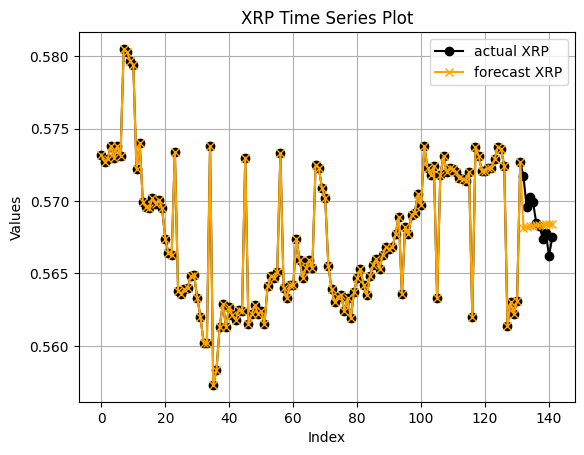

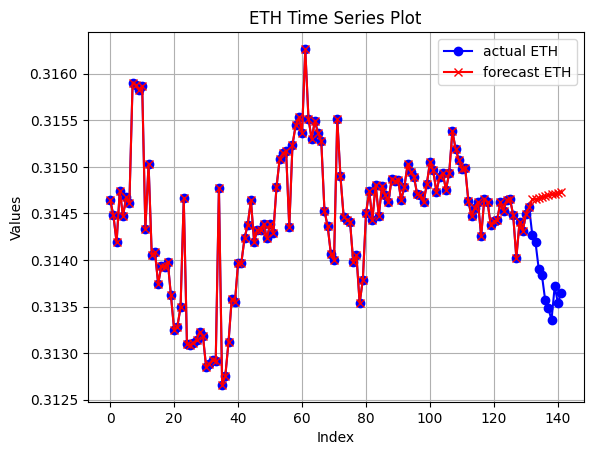

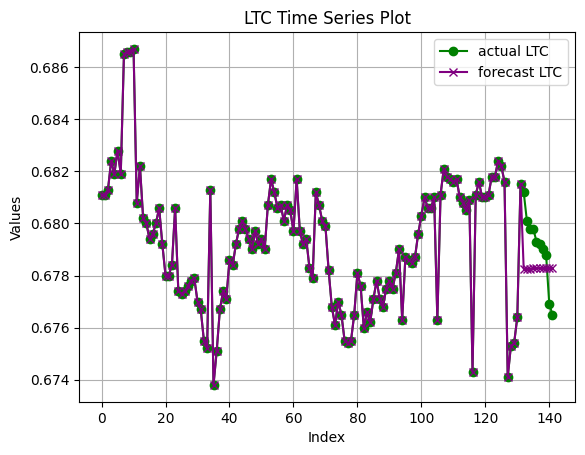

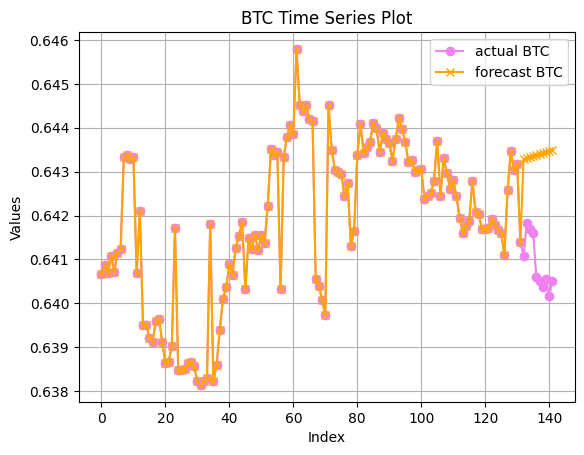

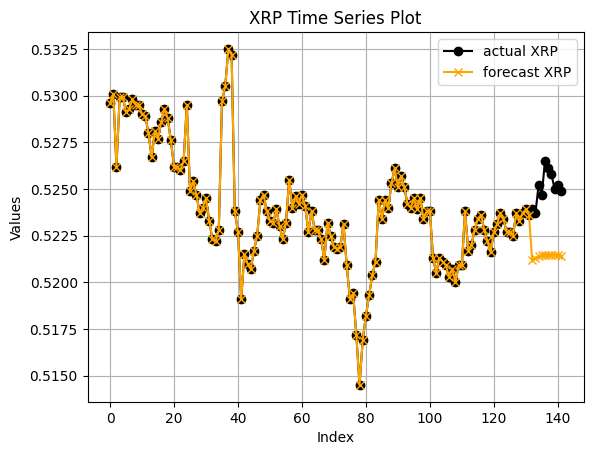

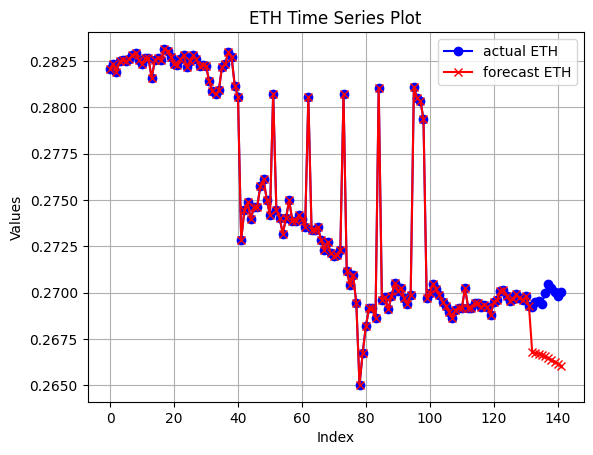

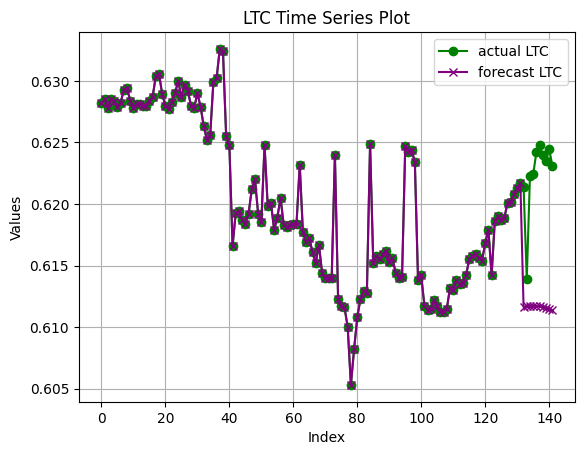

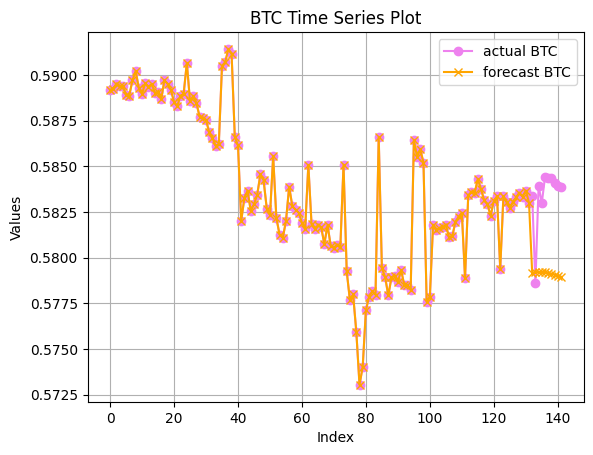

In [30]:
for i in range(batch_valid-cnt_thrown_idx):
    actual = pd.concat([pd.DataFrame(X_valid[i], columns = ['XRP', 'ETH', 'LTC', 'BTC']),  
                        pd.DataFrame(y_valid[i].reshape(frwd, n_features), columns = ['XRP', 'ETH', 'LTC', 'BTC'])], 
                        ignore_index = True)
    # print(actual)
    forecast = pd.concat([pd.DataFrame(X_valid[i], columns = ['XRP', 'ETH', 'LTC', 'BTC']),  
                          pd.DataFrame(y_hat[i].reshape(frwd, n_features), columns = ['XRP', 'ETH', 'LTC', 'BTC'])], 
                          ignore_index = True)
    # print(forecast)
# =================== XPR ======================== 
    fig, ax = plt.subplots()
    ax.plot(actual.index, actual['XRP'], label = 'actual XRP', marker = 'o', color = 'black')
    ax.plot(forecast.index, forecast['XRP'], label = 'forecast XRP', marker = 'x', color = 'orange')
    # Add labels and a title
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.set_title('XRP Time Series Plot')
    ax.legend() # Add legend
    ax.grid(True) # Add grid
    plt.show()
# =================== ETH ========================
    fig, ax = plt.subplots()
    ax.plot(actual.index, actual['ETH'], label = 'actual ETH', marker = 'o', color = 'blue')
    ax.plot(forecast.index, forecast['ETH'], label = 'forecast ETH', marker = 'x', color = 'red')
    # Add labels and a title
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.set_title('ETH Time Series Plot')
    ax.legend() # Add legend
    ax.grid(True) # Add grid
    plt.show()
# =================== LTC ========================
    fig, ax = plt.subplots()
    ax.plot(actual.index, actual['LTC'], label = 'actual LTC', marker = 'o', color = 'green')
    ax.plot(forecast.index, forecast['LTC'], label = 'forecast LTC', marker = 'x', color = 'purple')
    # Add labels and a title
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.set_title('LTC Time Series Plot')
    ax.legend() # Add legend
    ax.grid(True) # Add grid
    plt.show()
# =================== BTC ========================
    fig, ax = plt.subplots()
    ax.plot(actual.index, actual['BTC'], label = 'actual BTC', marker = 'o', color = 'violet')
    ax.plot(forecast.index, forecast['BTC'], label = 'forecast BTC', marker = 'x', color = 'orange')
    # Add labels and a title
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.set_title('BTC Time Series Plot')
    ax.legend() # Add legend
    ax.grid(True) # Add grid
    plt.show()